In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1.1 subject ID check

In [2]:
subject_list = pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/NN_subjects.txt", sep='\t')
subject_list2 = pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_pheno_up.csv")
subject_list3 = pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/main_pheno_up.csv")
subject_list2['batch'] = 'test'
subject_list3['batch'] = 'main'
sub_merged = pd.concat([subject_list2, subject_list3], axis=0)


scre_list_test = pd.read_excel('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_age_score.xlsx')
scre_list_main = pd.read_excel('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/main_age_score.xlsx')
score_table = pd.concat([scre_list_test,scre_list_main], axis=0)


sub_merged = sub_merged.reset_index(drop=True)
sub_merged['subjectid'] = sub_merged.subjectId
sub_merged.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/total_pheno.csv')


In [3]:
temp_LW_report = pd.read_csv('/Volumes/Work/Autism/data_910/LWReport_04182020_updated.csv', header=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (455) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
sub_merged = sub_merged[['subjectid', 'diagnosis_binary', 'batch']].merge(temp_LW_report[['subjectid','race','ethnicity']], on='subjectid', how='left')


In [5]:

a_race = []
for i in sub_merged.race.values:
    if i in ['White']:
        a_race.append('White')
    else:
        a_race.append('non-white')
sub_merged['a_race'] = a_race
print(sub_merged['a_race'].value_counts()
)

ethnicity = []
for i in sub_merged.ethnicity.values:
    if i in ['Hispanic or Latino','1/4 Hispanic or Latino', 'Hispanic or Latino ']:
        ethnicity.append('HL')
    elif i in ['Unknown or not reported','Unknown']:
        ethnicity.append('NA')
    else:
        ethnicity.append('non-HL')
sub_merged['a_his'] = ethnicity
sub_merged['a_his'].value_counts()

non-white    240
Name: a_race, dtype: int64


non-HL    146
HL         47
NA         47
Name: a_his, dtype: int64

In [6]:
pd.crosstab(sub_merged['diagnosis_binary'], sub_merged['ethnicity'])

ethnicity,1/4 Hispanic or Latino,Hispanic or Latino,Hispanic or Latino,Not Hispanic Latino,Not Hispanic or Latino,Unknown
diagnosis_binary,,,,,,
ASD,0,28,1,0,64,34
TD,1,17,0,1,81,13


In [7]:
pd.crosstab(sub_merged['diagnosis_binary'], sub_merged['a_his'])


a_his,HL,NA,non-HL
diagnosis_binary,,,
ASD,29,34,64
TD,18,13,82


In [21]:
sub_merged['mod'].value_counts()

caucasian          138
unknown             59
asian               17
caucasian/asian      9
africanamerican      9
pacificislander      5
other                3
Name: mod, dtype: int64

In [26]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged.a_his=='HL')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged.a_his=='non-HL')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged.a_his=='NA')]['weightedEstimate'],
                                )
print(fvalue, pvalue)
fvalue, pvalue = stats.f_oneway(sub_merged[(sub_merged['diagnosis_binary']=='TD') & (sub_merged.a_his=='HL')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='TD') & (sub_merged.a_his=='non-HL')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='TD') & (sub_merged.a_his=='NA')]['weightedEstimate'],
                                )
print(fvalue, pvalue)
fvalue, pvalue = stats.f_oneway(sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='caucasian')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='unknown')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='asian')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='caucasian/asian')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='africanamerican')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='pacificislander')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='other')]['weightedEstimate']
                                )
print(fvalue, pvalue)
fvalue, pvalue = stats.f_oneway(sub_merged[(sub_merged['diagnosis_binary']=='TD') & (sub_merged['mod']=='caucasian')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='TD') & (sub_merged['mod']=='unknown')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='asian')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='TD') & (sub_merged['mod']=='caucasian/asian')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='TD') & (sub_merged['mod']=='africanamerican')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='TD') & (sub_merged['mod']=='pacificislander')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='TD') & (sub_merged['mod']=='other')]['weightedEstimate']
                                )
print(fvalue, pvalue)
fvalue, pvalue = stats.f_oneway(sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='caucasian')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='unknown')]['weightedEstimate'],
                                sub_merged[(sub_merged['diagnosis_binary']=='ASD') & (sub_merged['mod']=='asian')]['weightedEstimate'],
                             )
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# # Ordinary Least Squares (OLS) model
# model = ols('value ~ C(treatments)', data=df_melt).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table
# # output (ANOVA F and p value)
#                 sum_sq    df         F    PR(>F)
# C(treatments)  3010.95   3.0  17.49281  0.000026
# Residual        918.00  16.0       NaN       NaN

# # ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
# from bioinfokit.analys import stat
# res = stat()
# res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
# res.anova_summary
# # output (ANOVA F and p value)
#                  df   sum_sq   mean_sq         F    PR(>F)
# C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
# Residual       16.0   918.00    57.375       NaN       NaN


0.8992104634806569 0.409527168387145
3.7188579311561303 0.027364021248122945
1.1511471189224112 0.3372183756369087
5.256693340034365 9.037768153061022e-05


In [13]:
# pd.crosstab(sub_merged['diagnosis_binary'], )
_dict = {}

for i in sub_merged['race'].value_counts().index.values:
    _text = ''.join(i.lower().split(' '))
    _text = '/'.join(_text.split('&'))
    _text = ''.join(_text.split('-'))
    _text = '/'.join(_text.split(','))
    _text = '/'.join(_text.split('&'))
    if _text=='caucasion':
        _text ='caucasian'
    elif _text=='asian/caucasian':
        _text ='caucasian/asian'
        
    elif _text.find('africanamerican') != -1:
        _text = 'africanamerican'
    elif _text.find('pacificislander') != -1:
        _text = 'pacificislander'
    elif _text.find('black/asiana/caucasian') != -1:
        _text = 'caucasian/asian'
    elif _text in ['other(indianfromindia)','filipino/vietnamese/cauc', 'caucasian/americanindian']:
        _text = 'other'

    _dict[i] = _text

sub_merged['mod'] = [_dict[i] for i in sub_merged['race'].values]
pd.crosstab(sub_merged['diagnosis_binary'], sub_merged['mod'])

mod,africanamerican,asian,caucasian,caucasian/asian,other,pacificislander,unknown
diagnosis_binary,,,,,,,
ASD,5,8,65,4,2,3,40
TD,4,9,73,5,1,2,19


In [14]:
sub_merged = sub_merged[['subjectid', 'diagnosis_binary', 'batch', 'a_race', 'mod', 'a_his']]
sub_merged = sub_merged.merge(score_table[['subjectID', 'weightedEstimate']], left_on='subjectid', right_on='subjectID', how='inner')


In [54]:
sub_merged

,subjectid,diagnosis_binary,batch,a_race,mod,a_his,subjectID,weightedEstimate
0,A3W6D,ASD,test,non-white,caucasian,non-HL,A3W6D,0.559470
1,A5G5M,ASD,test,non-white,caucasian,non-HL,A5G5M,0.817735
2,A5M2D,ASD,test,non-white,caucasian,non-HL,A5M2D,0.874263
3,A6L7X,ASD,test,non-white,unknown,HL,A6L7X,0.780624
4,B4Z9C,TD,test,non-white,caucasian,non-HL,B4Z9C,0.243480
...,...,...,...,...,...,...,...,...
235,Z6A9K,TD,main,non-white,other,non-HL,Z6A9K,0.592319
236,Z6G7S,ASD,main,non-white,unknown,NA,Z6G7S,0.927706
237,Z7W4J,TD,main,non-white,caucasian,non-HL,Z7W4J,0.537192
238,Z8C9B,TD,main,non-white,caucasian,HL,Z8C9B,0.165574


In [42]:
a_dict = {}
for i in sub_merged['diagnosis_binary'].unique().tolist():
    a_dict[i] = {}
    _temp_list = []
    for j in sub_merged['mod'].unique().tolist():
        subsub_ = sub_merged[(sub_merged.diagnosis_binary==i)&(sub_merged['mod']==j)].weightedEstimate.tolist()
        
        if len(subsub_)>1:
            _temp_list.append([j, str(len(subsub_)), str(round(np.mean(subsub_),3))+" ("+str(round(np.std(subsub_),3))+")"])
        else:
            _temp_list.append([j, str(len(subsub_)), str(round(np.mean(subsub_),3))+" (null)"])
    a_dict[i] = _temp_list
#         print(i,j,subsub_mean, subsub_std)
_1 = pd.DataFrame(a_dict['ASD'], columns=['Race', 'Size', 'Mean (Std)'])
_2 = pd.DataFrame(a_dict['TD'], columns=['Race', 'Size', 'Mean (Std)'])
_1.merge(_2, on='Race', how='left')

{'ASD': [['caucasian', '65', '0.675 (0.253)'],
  ['unknown', '40', '0.755 (0.18)'],
  ['caucasian/asian', '4', '0.861 (0.15)'],
  ['africanamerican', '5', '0.799 (0.221)'],
  ['asian', '8', '0.789 (0.212)'],
  ['pacificislander', '3', '0.795 (0.09)'],
  ['other', '2', '0.797 (0.005)']],
 'TD': [['caucasian', '73', '0.364 (0.24)'],
  ['unknown', '19', '0.284 (0.175)'],
  ['caucasian/asian', '5', '0.358 (0.212)'],
  ['africanamerican', '4', '0.508 (0.288)'],
  ['asian', '9', '0.421 (0.314)'],
  ['pacificislander', '2', '0.185 (0.088)'],
  ['other', '1', '0.592 (null)']]}

In [57]:
a_dict = {}
for i in sub_merged['diagnosis_binary'].unique().tolist():
    a_dict[i] = {}
    _temp_list = []
    for j in sub_merged['a_his'].unique().tolist():
        subsub_ = sub_merged[(sub_merged.diagnosis_binary==i)&(sub_merged['a_his']==j)].weightedEstimate.tolist()
        
        if len(subsub_)>1:
            _temp_list.append([j, str(len(subsub_)), str(round(np.mean(subsub_),3))+" ("+str(round(np.std(subsub_),3))+")"])
        else:
            _temp_list.append([j, str(len(subsub_)), str(round(np.mean(subsub_),3))+" (null)"])
    a_dict[i] = _temp_list
#         print(i,j,subsub_mean, subsub_std)
a_dict
_1 = pd.DataFrame(a_dict['ASD'], columns=['Ethinicity', 'Size', 'Mean (Std)'])
_2 = pd.DataFrame(a_dict['TD'], columns=['Ethinicity', 'Size', 'Mean (Std)'])
_1.merge(_2, on='Ethinicity', how='left')


,Ethinicity,Size_x,Mean (Std)_x,Size_y,Mean (Std)_y
0,non-HL,64,0.7 (0.253),82,0.396 (0.248)
1,HL,29,0.723 (0.197),18,0.273 (0.22)
2,NA,34,0.765 (0.187),13,0.245 (0.138)


,Race,Size_x,Mean (Std)_x,Size_y,Mean (Std)_y
0,caucasian,65,0.675 (0.253),73,0.364 (0.24)
1,unknown,40,0.755 (0.18),19,0.284 (0.175)
2,caucasian/asian,4,0.861 (0.15),5,0.358 (0.212)
3,africanamerican,5,0.799 (0.221),4,0.508 (0.288)
4,asian,8,0.789 (0.212),9,0.421 (0.314)
5,pacificislander,3,0.795 (0.09),2,0.185 (0.088)
6,other,2,0.797 (0.005),1,0.592 (null)


In [ ]:
melted_sence_target_table = sub_merged[['mod', 'diagnosis_binary', 'a_his']].melt(id_vars=['mod', 'a_diag', ],
                                                    value_vars=[, 
                                        'BST', 'BSCSC', 'BSTC'], var_name='AOI')

In [38]:
# pd.crosstab(sub_merged['diagnosis_binary'], )
sub_merged['ethnicity'].value_counts().index.values

array(['Not Hispanic or Latino', 'Unknown', 'Hispanic or Latino',
       'Not Hispanic Latino', '1/4 Hispanic or Latino',
       'Hispanic or Latino '], dtype=object)

In [4]:
sub_merged[sub_merged.blooddrawid.isin(subject_list.blooddrawid)]

,Unnamed: 0,subjectId,blooddrawid,age,recentDx_EvalDate,diagnosis_binary,diagnosis_multi1,batch,sex,Neutrophil,Tcell,Monocyte,Bcell,NKcell,PlasmaCell,DendriticCell,final_ADOS_CoSoTot,recentDxJ_dxCode,recentDxJ_ageMo
0,68,A3W6D,242-01,36.205,09-03-10,ASD,ASD,2,M,0.004172,0.017931,0.040513,-0.072623,-0.000438,0.027928,0.011641,15.0,ASD,36.205
1,80,A5G5M,299-01,32.066,02-03-09,ASD,ASD,2,M,0.036179,-0.028177,0.019183,0.024875,-0.057716,0.020187,-0.020063,11.0,ASD,32.066
2,13,A5M2D,129-01,32.526,03-27-08,ASD,PDDNOS,2,M,0.006200,0.010815,0.021127,-0.042200,0.001227,0.002585,-0.009940,17.0,ASD,32.526
3,25,A6L7X,151-01,43.598,07-24-09,ASD,ASD,2,M,-0.011303,0.044493,-0.005998,0.042129,-0.071666,0.004722,-0.033243,12.0,ASD,43.598
4,249,B4Z9C,624,37.749,04-05-12,TD,PrevLDDTyp,2,M,-0.011319,0.052890,-0.043108,0.066529,-0.020442,-0.038031,-0.038827,0.0,TD,37.749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,4807135011_C,Z6A9K,325-01,33.971,9/20/10 0:00,TD,ASD Features,WG6,M,-0.014417,0.046347,-0.003338,0.031161,-0.023579,-0.044945,-0.040187,7.0,TD,33.971
171,372,Z6G7S,856-01,37.125,12-06-11,ASD,ASD,1,M,-0.016810,-0.005200,-0.008820,0.073182,-0.033309,0.009854,-0.050478,13.0,ASD,37.125
172,4807258016_E,Z7W4J,155-01,46.423,3/23/10 0:00,TD,PrevLDDTyp,WG6,M,0.008556,0.000620,-0.018448,0.040078,0.008031,0.004631,-0.022913,3.0,TD,46.423
173,4807258027_F,Z8C9B,224-01,34.136,4/14/10 0:00,TD,PrevLDDTyp,WG6,M,0.028502,-0.023352,-0.012929,0.024671,-0.010466,-0.010201,-0.012341,3.0,TD,34.136


In [3]:
sub_merged[~sub_merged.subjectId.isin(set(subject_list.subjectId)  & set(sub_merged.subjectId))].diagnosis_binary.value_counts()

ASD    16
TD      6
Name: diagnosis_binary, dtype: int64

### generate perm data running code

In [4]:
for i in range(1,6):
    print("nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out"+str(i)+"/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out"+str(i)+"/log.txt &")


nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out1/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out1/log.txt &
nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out2/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out2/log.txt &
nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out3/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out3/log.txt &
nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out4/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out4/log.txt &
nohup Rscript myFoldRunnerFn.R /data/bokan/6_sample_score/final_testDataset_HT12_test/out5/ > /data/bokan/6_sample_score/final_testDataset_HT12_test/out5/log.txt &


In [5]:
import json
import matplotlib.pyplot as plt
import os.path
from os import path

In [6]:
with open('/Volumes/Work/Vahid_work/classification_newcode_data/final_classificationSet_main/feature.json') as f:
    data = json.load(f)
    

In [7]:
_the_table = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_classificationSet_main/roc_mean.csv', index_col=0)
_the_table = _the_table.drop('sqda',axis=1)

In [8]:
five_iteration = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_classificationSet_main/5_interation_data.csv', index_col=0)
five_iteration['route'] = ['_'.join(i.split('_')[2:]) for i in five_iteration.index.to_list()]

In [9]:
five_iteration['route']

real_1_no_no_sis                                                                                  no_no_sis
real_1_no_grn4_sis                                                                              no_grn4_sis
real_1_no_grn4Cntl_sis                                                                      no_grn4Cntl_sis
real_1_no_grn5_sis                                                                              no_grn5_sis
real_1_no_grn5Cntl_sis                                                                      no_grn5Cntl_sis
                                                                                 ...                       
real_5_varImportance_selectVnotComFair_cor_cppls                  varImportance_selectVnotComFair_cor_cppls
real_5_varImportance_selectVnotComFair_cor_zscore_no          varImportance_selectVnotComFair_cor_zscore_no
real_5_varImportance_selectVnotComFair_cor_zscore_pcr        varImportance_selectVnotComFair_cor_zscore_pcr
real_5_varImportance_selectV

In [10]:
_the_table_counts = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_classificationSet_main/roc_counts.csv', index_col=0)
_the_table_counts = _the_table_counts.drop('sqda',axis=1)


In [11]:
_the_table_counts

,reg,logReg,lda,qda,ridgeReg,lassoReg,ridgeLogReg,lassoLogReg,elasticNetLogReg,randomForest,boosting,bagging
real_no_no_sis,5,5,5,5,5,5,5,5,5,5,5,5
real_no_grn4_sis,5,5,5,5,5,5,5,5,5,5,5,5
real_no_grn4Cntl_sis,5,5,5,5,5,5,5,5,5,5,5,5
real_no_grn5_sis,5,5,5,5,5,5,5,5,5,5,5,5
real_no_grn5Cntl_sis,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
real_varImportance_selectVnotComFair_grn3_zscore_plsr,1,1,1,1,1,1,1,1,1,1,1,1
real_varImportance_selectVnotComFair_grn3_zscore_cppls,1,1,1,1,1,1,1,1,1,1,1,1
real_varImportance_selectVnotComFair_grn3Cntl_zscore_pcr,1,1,1,1,1,1,1,1,1,1,1,1
real_varImportance_selectVnotComFair_grn3Cntl_zscore_plsr,1,1,1,1,1,1,1,1,1,1,1,1


In [12]:
# main_route_list = _the_table_counts.index.to_list()

In [13]:
f1 = ['no', 'cov_var', 'cov', 'varImportance', 'var']
f2 = ['no', 'grn', 'selectV', 'zscore', 'svm', 'GSEA', 'DE']
f3 = ['no', 'plsr', 'pcr', 'cppls', 'wgcna', 'logisticFwd','sis']
main_route_list = [i[5:] for i in _the_table_counts.index.to_list()]
# ['no', 'cov', 'var', 'cor_var', 'varImportance']
# ['no', 'cov', 'var', 'cor_var', 'varImportance']
feature_1_main = [0]*5
feature_2_main = [0]*7
feature_3_main = [0]*7
for i in main_route_list:
    _found = False
    for p1dex,p1 in enumerate(f1): 
#         print(p1)
        if i.startswith(p1):
            feature_1_main[p1dex] += 1
            temp = i[len(p1)+1:]
            _found = True
            break
    assert _found,'round1'
    _found = False
    for p2dex,p2 in enumerate(f2): 
        if temp.startswith(p2):
            feature_2_main[p2dex] += 1
            _found = True
            break
    assert _found,'round2 '+i+" "+temp
    _found = False
    for p3dex,p3 in enumerate(f3): 
        if i.endswith(p3):
            feature_3_main[p3dex] += 1
            _found = True
            break
    assert _found,'round3'

In [14]:
pd.DataFrame(data=[feature_1_main, feature_2_main, feature_3_main]).transpose()

,0,1,2
0,539.0,30.0,373.0
1,400.0,386.0,372.0
2,415.0,1516.0,372.0
3,420.0,128.0,371.0
4,527.0,0.0,149.0
5,NaN,241.0,291.0
6,NaN,0.0,373.0


## 1.1 How many interations in 5 cross-validation?

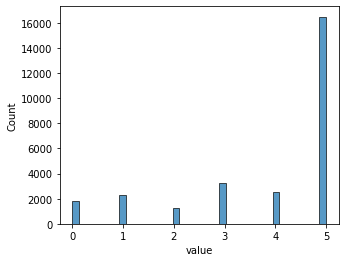

In [15]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(data=_the_table_counts.melt(), x="value")

In [16]:
_melt = _the_table_counts.melt()
_melt.value.value_counts()
_the_list = []
for i in set(_the_table_counts.columns):
    _the_list.append(_melt[(_melt.variable==i) & (_melt.value==5)].shape[0])
_the_list

[1355, 1396, 1355, 1396, 1355, 1396, 1355, 1322, 1396, 1396, 1402, 1355]

In [17]:
_the_table_counts = _the_table_counts[(_the_table_counts == 5).all(1)]
_the_table = _the_table[_the_table.index.isin(_the_table_counts.index)]
# _the_table_counts

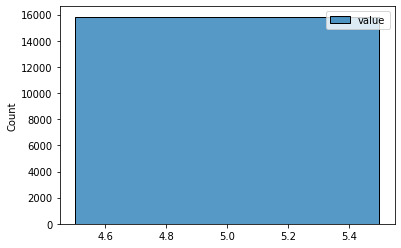

In [18]:
sns.histplot(data=_the_table_counts.melt())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


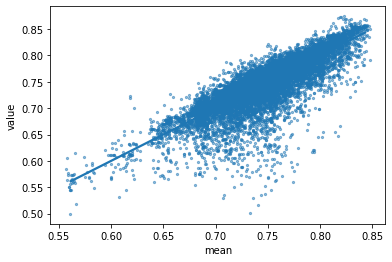

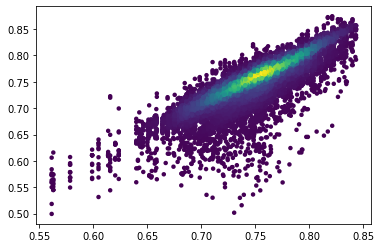

In [20]:
import itertools

_repeat_list = list(itertools.chain.from_iterable(itertools.repeat(x, 12) for x in _the_table.transpose().mean()))
_the_table_melt=_the_table.transpose().melt()
_the_table_melt['mean'] = _repeat_list
_the_table_melt

ax = sns.scatterplot()
ax = sns.regplot(x="mean", y="value", data=_the_table_melt, ci=5, scatter_kws={'s':5,'alpha':0.5}, x_jitter=0.005)
x = _the_table_melt["mean"]
y = _the_table_melt["value"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=20, edgecolor='')
plt.show()

In [21]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt


%matplotlib inline


def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="")

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid) - 1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0 / float(nboot))

    return ax

# heights = np.array([50,52,53,54,58,60,62,64,66,67,68,70,72,74,76,55,50,45,65])
# weights = np.array([25,50,55,75,80,85,50,65,85,55,45,45,50,75,95,65,50,40,45])
def customized_ci_plotting(x, y, address, fmt):
    # x = _the_table_melt['mean'].to_list()
    # y = _the_table_melt['value'].to_list()

    # Modeling with Numpy
    def equation(a, b):
        """Return a 1D polynomial."""
        return np.polyval(a, b) 

    p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
    y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

    # Statistics
    n = len(_the_table_melt['mean'])                                           # number of observations
    m = p.size                                                 # number of parameters
    dof = n - m                                                # degrees of freedom
    t = stats.t.ppf(0.975, n - m)                              # used for CI and PI bands

    # Estimates of Error in Data/Model
    resid = y - y_model                           
    chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
    chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
    s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error


    # Plotting --------------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 6))

    # Data
#     ax.plot(
#         x, y, "o", color="#b9cfe7", markersize=1, 
#         markeredgewidth=1, markeredgecolor="b", markerfacecolor="None"
#     )
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

#     fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=z, s=5, alpha=0.3)
#     plt.show()
    handles, labels = scatter.legend_elements(prop="colors", alpha=1)
    legend2 = ax.legend(handles, labels, bbox_to_anchor = (1.01, 1), title="Density")
    ax.add_artist(legend2)
    ax.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.2, label="Fit")  
    
    x2 = np.linspace(np.min(x), np.max(x), 100)
    y2 = equation(p, x2)

    # Confidence Interval (select one)
    plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
    #plot_ci_bootstrap(x, y, resid, ax=ax)

    # Prediction Interval
    pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
    print(pi)
    ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
    ax.plot(x2, y2 - pi, "--", color="0.5", label="95% Prediction Limits")
    ax.plot(x2, y2 + pi, "--", color="0.5")


    # Figure Modifications --------------------------------------------------------
    # Borders
    ax.spines["top"].set_color("0.5")
    ax.spines["bottom"].set_color("0.5")
    ax.spines["left"].set_color("0.5")
    ax.spines["right"].set_color("0.5")
    ax.get_xaxis().set_tick_params(direction="out")
    ax.get_yaxis().set_tick_params(direction="out")
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left() 

    # Labels
    plt.title("Fit Plot for score over mean", fontsize="14", fontweight="bold")
    plt.xlabel("Mean RUC-ROC score of each route")
    plt.ylabel("12 RUC-ROC scores of each route")
    plt.xlim(np.min(x) - 0.01, np.max(x) +0.01)

    # Custom legend
    handles, labels = ax.get_legend_handles_labels()
    display = (0, 1)
    anyArtist = plt.Line2D((0, 1), (0, 0), color="#b9cfe7")    # create custom artists
    legend = plt.legend(
        [handle for i, handle in enumerate(handles) if i in display] + [anyArtist],
        [label for i, label in enumerate(labels) if i in display] + ["95% Confidence Limits"],
        loc=9, bbox_to_anchor=(0, -0.21, 1., 0.102), ncol=3, mode="expand"
    )  
    frame = legend.get_frame().set_edgecolor("0.5")

    # Save Figure
    plt.tight_layout()
    plt.savefig(address, format=fmt, bbox_extra_artists=(legend,legend2), bbox_inches="tight")

    plt.show()
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


[0.05147102 0.05146987 0.05146874 0.05146763 0.05146653 0.05146545
 0.05146439 0.05146335 0.05146232 0.05146132 0.05146032 0.05145935
 0.05145839 0.05145746 0.05145653 0.05145563 0.05145475 0.05145388
 0.05145303 0.05145219 0.05145138 0.05145058 0.0514498  0.05144903
 0.05144828 0.05144756 0.05144684 0.05144615 0.05144547 0.05144482
 0.05144417 0.05144355 0.05144294 0.05144236 0.05144178 0.05144123
 0.05144069 0.05144017 0.05143967 0.05143919 0.05143872 0.05143827
 0.05143784 0.05143743 0.05143703 0.05143665 0.05143629 0.05143595
 0.05143562 0.05143531 0.05143502 0.05143475 0.05143449 0.05143425
 0.05143403 0.05143383 0.05143364 0.05143347 0.05143332 0.05143319
 0.05143307 0.05143297 0.05143289 0.05143282 0.05143278 0.05143275
 0.05143274 0.05143274 0.05143277 0.05143281 0.05143287 0.05143294
 0.05143304 0.05143315 0.05143328 0.05143342 0.05143359 0.05143377
 0.05143397 0.05143418 0.05143442 0.05143467 0.05143494 0.05143522
 0.05143553 0.05143585 0.05143618 0.05143654 0.05143691 0.0514

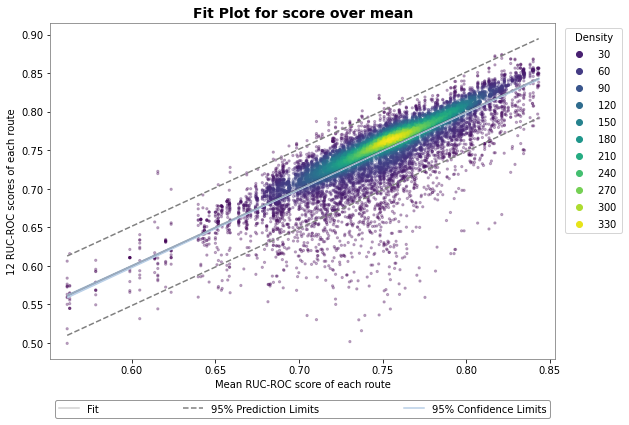

In [22]:
customized_ci_plotting(_the_table_melt["mean"], _the_table_melt["value"], address="/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/suppl_main_mean_vs_all_score.pdf", fmt='pdf')


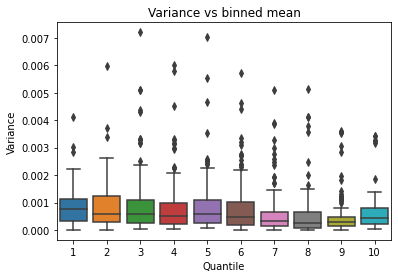

In [23]:
_temp_data= pd.DataFrame(data={'y':_the_table.transpose().var(),'x':_the_table.transpose().mean()})
_temp_data['mean_bin'] = pd.qcut(_temp_data['x'], q=10, labels=range(1,11))
fig, ax = plt.subplots(figsize=(6, 4))
# sns.scatterplot(data=_temp_data, x="mean_bin", y="y", s=8)
ax = sns.boxplot(x="mean_bin", y="y", data=_temp_data)
plt.xlabel("Quantile")
plt.ylabel("Variance")
plt.title("Variance vs binned mean")
plt.savefig("/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/suppl_main_mean_vs_score_var.pdf", format='pdf')



In [24]:
arr = _temp_data.y.to_list()
arr = sorted(arr)
print(arr[int(1320*0.025)], arr[int(1320*0.975)])

alpha = 0.05               # significance level = 5%
n = len(arr)               # sample sizes
# s2 = np.var(arr, ddof=1)   # sample variance
df = n - 1                 # degrees of freedom

upper = (n - 1) * np.mean(arr) / stats.chi2.ppf(alpha / 2, df)
lower = (n - 1) * np.mean(arr) / stats.chi2.ppf(1 - alpha / 2, df)
print(upper, lower)
# sns.histplot(_temp_data.y)
np.mean(arr)

3.3645451701250365e-05 0.0033712805671013576
0.0008117499145029742 0.0006967973547655506


0.0007509707504867486

In [25]:
feature_method_dict = {}
the_array = np.array(_the_table)
main_feature_classifier = [[],[]]
# five_iteration = np.ara
import numpy as np
for i in _the_table.index.tolist():
    _name = "_".join(i.split("_")[1:])
    for j in _the_table.columns.tolist():
        if _the_table_counts.loc[i,j] == 5:
            if _the_table.loc[i,j] > 0.8:
                if _name not in feature_method_dict.keys():
                    feature_method_dict[_name] = [j]
                else:
                    feature_method_dict[_name].append(j)
            main_feature_classifier[0].append("@".join([_name,j]))
            main_feature_classifier[1].append(_the_table.loc[i,j])
            


In [26]:
feature_method_dict

{'no_selectVcomFair_logisticFwd': ['reg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg',
  'randomForest'],
 'no_selectVcomFair_sis': ['reg',
  'logReg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg',
  'randomForest'],
 'no_selectVcomFair_cor_logisticFwd': ['reg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg',
  'randomForest'],
 'no_selectVcomFair_cor_sis': ['reg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg'],
 'no_selectVnotComHC_grn3_logisticFwd': ['ridgeReg'],
 'no_selectVnotComFair_logisticFwd': ['reg',
  'logReg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg',
  'randomForest',
  'boosting',
  'bagging'],
 'no_selectVnotComFair_sis': ['reg',
  'logReg',
  'lda',
  'ridgeReg',
  'lassoReg',
  'ridgeLogReg',
  'lassoLogReg',
  'elasticNetLogReg'],
 'no_

In [26]:
# # _list = list(feature_method_dict)
# # for i in _list:
# #     if 
# _count=0
# for i in feature_method_dict:
#     if i.find('wgcna')!=-1:
#         _count+=1
#         if i in temp_dict.keys():
#             print(i)
# print(_count)


### Suppl Fig 2

In [27]:
roc_all_array=[]
for i in feature_method_dict:
    for j in feature_method_dict[i]:
        roc_all_array.append(five_iteration[five_iteration.route==i].loc[:,j].to_list())
roc_all_table = pd.DataFrame(roc_all_array)

In [28]:
roc_all_table["means"]=roc_all_table.mean(axis=1)
roc_all_table = roc_all_table.sort_values(by='means')
roc_all_table

,0,1,2,3,4,means
1438,0.817544,0.798611,0.724490,0.863333,0.796053,0.800006
1436,0.817544,0.798611,0.724490,0.863333,0.796053,0.800006
1319,0.817544,0.847222,0.772109,0.806667,0.756579,0.800024
464,0.814035,0.788194,0.741497,0.890000,0.766447,0.800035
1461,0.831579,0.864583,0.816327,0.830000,0.657895,0.800077
...,...,...,...,...,...,...
805,0.884211,0.875000,0.838435,0.883333,0.865132,0.869222
647,0.910526,0.885417,0.804422,0.883333,0.871711,0.871082
649,0.915789,0.885417,0.806122,0.883333,0.871711,0.872474
801,0.884211,0.885417,0.824830,0.883333,0.888158,0.873190


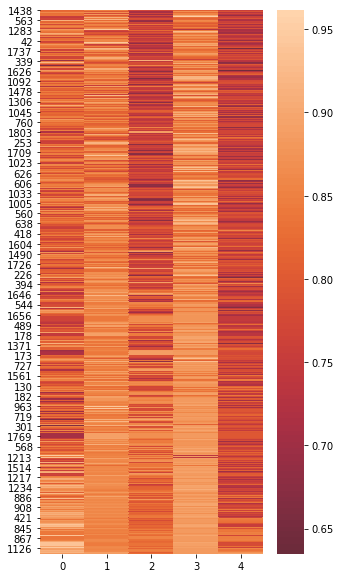

In [29]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(roc_all_table[[0,1,2,3,4]], center=0.5, ax=ax,)
fig.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_1_au_roc_heatmap.svg')

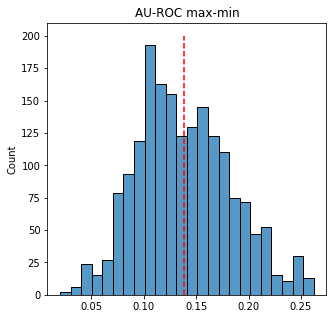

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(roc_all_table.max(axis=1)-roc_all_table.min(axis=1))
plt.vlines(x=0.13845470277871788, ymin=0, ymax=200, linestyles='dashed', colors='red')
plt.title('AU-ROC max-min')
fig.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_1_au_roc_max_min.svg', format='svg')

In [31]:
print(np.mean(roc_all_table.max(axis=1)-roc_all_table.min(axis=1)), np.var(roc_all_table.max(axis=1)-roc_all_table.min(axis=1)))

0.13845470277871788 0.0020040852777799874


In [32]:
np.var([1,0])

0.25

In [33]:
main_feature_list = list(feature_method_dict.keys())
len(main_feature_list)

268

In [34]:
main_feature_list

['no_selectVcomFair_logisticFwd',
 'no_selectVcomFair_sis',
 'no_selectVcomFair_cor_logisticFwd',
 'no_selectVcomFair_cor_sis',
 'no_selectVnotComHC_grn3_logisticFwd',
 'no_selectVnotComFair_logisticFwd',
 'no_selectVnotComFair_sis',
 'no_selectVnotComFair_cor_logisticFwd',
 'no_selectVnotComFair_cor_sis',
 'no_zscore_cppls',
 'no_zscore_cor_pcr',
 'no_zscore_cor_plsr',
 'no_zscore_cor_cppls',
 'no_selectVcomExpHC_pcr',
 'no_selectVcomExpHC_plsr',
 'no_selectVcomExpHC_cppls',
 'no_selectVcomExpHC_cor_plsr',
 'no_selectVcomExpHC_cor_cppls',
 'no_selectVcomExpHC_cor_zscore_plsr',
 'no_selectVcomExpHC_cor_zscore_cppls',
 'no_selectVcomHC_pcr',
 'no_selectVcomHC_plsr',
 'no_selectVcomHC_cppls',
 'no_selectVcomHC_cor_plsr',
 'no_selectVcomHC_cor_cppls',
 'no_selectVcomHC_cor_zscore_plsr',
 'no_selectVcomHC_cor_zscore_cppls',
 'no_selectVcomFair_no',
 'no_selectVcomFair_plsr',
 'no_selectVcomFair_cppls',
 'no_selectVcomFair_cor_no',
 'no_selectVcomFair_cor_pcr',
 'no_selectVcomFair_cor_plsr'

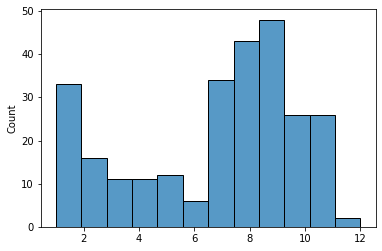

In [35]:
sns.histplot([len(feature_method_dict[i]) for i in feature_method_dict.keys()],bins=12)

In [36]:
temp_dict = {}
missed = []
feature_distribution = []
all_other = []
for i in data:
    the_route = i['method'][0]
    if  the_route.find('cppls') != -1 or the_route.find('plsr') != -1 or the_route.find('pcr') != -1:
        name = "_".join(the_route.split('_')[2:])
        if path.exists('/Volumes/Work/Vahid_work/classification_newcode_data/main_feature/'+the_route+'.txt'):
            gene_vec = [gene.rstrip("\n") for gene in open('/Volumes/Work/Vahid_work/classification_newcode_data/main_feature/'+the_route+'.txt').readlines()]
            if name not in temp_dict.keys():
                temp_dict[name] = [gene_vec]
            else:
                temp_dict[name].append(gene_vec)
            feature_distribution.append(len(gene_vec))
        else:
            print("Not found", the_route)
            missed.append(the_route)
    else:
        name = "_".join(i['method'][0].split('_')[2:])
        if name not in temp_dict.keys():
            temp_dict[name] = [i['features']]
        else:
            temp_dict[name].append(i['features'])
        all_other.append(len(i['features']))

In [37]:
len(feature_distribution)

4698

(array([3.97e+03, 1.58e+02, 2.32e+02, 3.50e+01, 1.91e+02, 2.10e+01,
        1.00e+00, 6.00e+01, 1.60e+01, 1.40e+01]),
 array([3.0000e+00, 7.4710e+02, 1.4912e+03, 2.2353e+03, 2.9794e+03,
        3.7235e+03, 4.4676e+03, 5.2117e+03, 5.9558e+03, 6.6999e+03,
        7.4440e+03]),
 <a list of 10 Patch objects>)

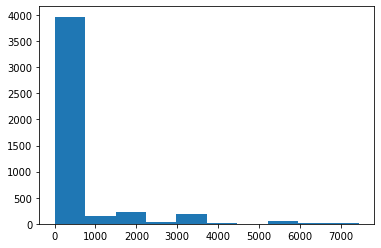

In [38]:
plt.hist(feature_distribution)
# plt.xlim([0,100])

(0.0, 500.0)

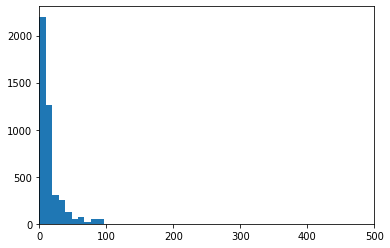

In [39]:
plt.hist([i for i in all_other if i<100])
plt.xlim([0,500])

# for the test

In [40]:
_the_table_test = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_test/roc_mean.csv', index_col=0)

_the_table_test = _the_table_test.drop('sqda', axis=1)
test_feature_method_dict = {} 
route_list_test = []
test_feature_classifier = [[],[]]
test_feature_distribution = []
_count = 0
for i in _the_table_test.index.tolist():
    _name = "_".join(i.split("_")[1:])
    for j in _the_table_test.columns.tolist():
        if _the_table_test.loc[i,j] > 0.8:
            if _name not in test_feature_method_dict.keys():
                test_feature_method_dict[_name] = [j]
            else:
                test_feature_method_dict[_name].append(j)
#             if i in _the_table.index.to_list() and j in _the_table.columns.to_list() and _the_table.loc[i,j] > 0.8:
#                 _count += 1
#             test_feature_distribution.append(len(gene_vec))
        test_feature_classifier[0].append("@".join([_name,j]))
        test_feature_classifier[1].append(_the_table_test.loc[i,j])
route_list_test = list(test_feature_method_dict.keys())
print(_count)
with open('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_test/feature.json') as f:
    data_test = json.load(f)
            
test_temp_dict = {}
missed = []
for i in data_test:
    the_route = i['method'][0]
    if  the_route.find('cppls') != -1 or the_route.find('plsr') != -1 or the_route.find('pcr') != -1:
        name = "_".join(the_route.split('_')[1:])
        if path.exists('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_test/test_feature/'+the_route+'.txt'):
            gene_vec = [gene.rstrip("\n") for gene in open('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_test/test_feature/'+the_route+'.txt').readlines()]
#             [int(i) for i in gene_vec]
            if name not in test_temp_dict.keys():
                test_temp_dict[name] = [gene_vec]
            else:
                test_temp_dict[name].append(gene_vec)
        else:
            print("Not found", the_route)
            missed.append(the_route)
    else:
        name = "_".join(i['method'][0].split('_')[1:])

        if name not in test_temp_dict.keys():
            test_temp_dict[name] = [i['features']]
        else:
            test_temp_dict[name].append(i['features'])
        
the_overlap = sorted(list(set(main_feature_list).intersection(set(route_list_test))))
_yst=test_temp_dict['cov_selectVcomExpHC_cor_cppls']

0
Not found independent_cov_grn1_cppls
Not found independent_cov_grn1Cntl_cppls


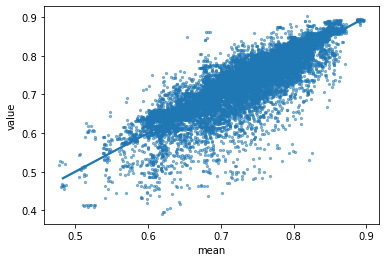

In [41]:
_updated_the_table_test = _the_table_test[(_the_table_test > 0.1).all(1)]
_repeat_list_test = list(itertools.chain.from_iterable(itertools.repeat(x, 12) for x in _updated_the_table_test.transpose().mean()))
_the_table_melt_test = _updated_the_table_test.transpose().melt()
_the_table_melt_test['mean'] = _repeat_list_test
_the_table_melt_test

ax = sns.scatterplot()
ax = sns.regplot(x="mean", y="value", data=_the_table_melt_test, ci=95, scatter_kws={'s':5,'alpha':0.5}, x_jitter=0.005)
x = _the_table_melt_test["mean"]
y = _the_table_melt_test["value"]



0.030360531309297945 0.29506641366223907
(0.10919411195297458, 0.1162099549586219)


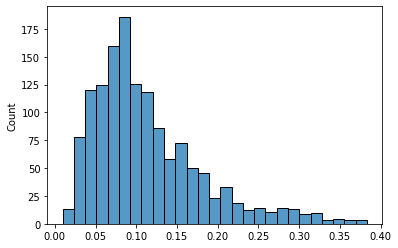

In [98]:
divence = sorted(_updated_the_table_test.max(axis=1)-_updated_the_table_test.min(axis=1))
print(divence[int(0.025*len(divence))], divence[int(0.975*len(divence))])
import numpy as np, scipy.stats as st

print(st.t.interval(0.95, len(divence)-1, loc=np.mean(divence), scale=st.sem(divence)))
sns.histplot(_updated_the_table_test.max(axis=1)-_updated_the_table_test.min(axis=1))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


[0.07965368 0.07965249 0.07965132 0.07965017 0.07964903 0.07964792
 0.07964682 0.07964575 0.07964469 0.07964366 0.07964264 0.07964164
 0.07964066 0.07963971 0.07963877 0.07963785 0.07963695 0.07963607
 0.07963521 0.07963437 0.07963355 0.07963275 0.07963196 0.0796312
 0.07963046 0.07962973 0.07962903 0.07962835 0.07962768 0.07962703
 0.07962641 0.0796258  0.07962522 0.07962465 0.0796241  0.07962357
 0.07962306 0.07962257 0.0796221  0.07962165 0.07962122 0.07962081
 0.07962042 0.07962005 0.0796197  0.07961936 0.07961905 0.07961876
 0.07961848 0.07961823 0.07961799 0.07961778 0.07961758 0.07961741
 0.07961725 0.07961711 0.07961699 0.0796169  0.07961682 0.07961676
 0.07961672 0.0796167  0.0796167  0.07961672 0.07961676 0.07961681
 0.07961689 0.07961699 0.07961711 0.07961724 0.0796174  0.07961757
 0.07961777 0.07961798 0.07961822 0.07961847 0.07961874 0.07961904
 0.07961935 0.07961968 0.07962003 0.0796204  0.07962079 0.0796212
 0.07962163 0.07962208 0.07962255 0.07962304 0.07962355 0.079624

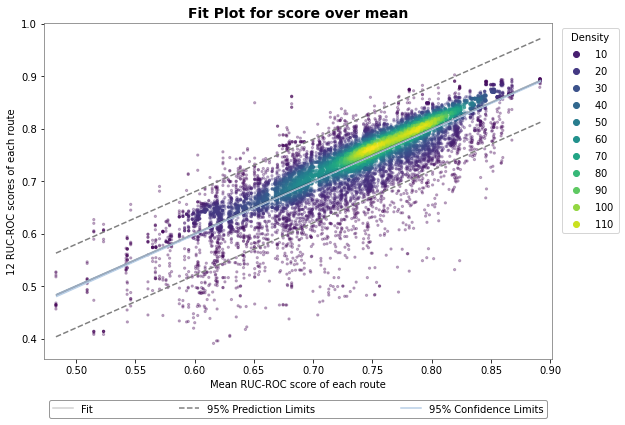

In [43]:
customized_ci_plotting(_the_table_melt_test["mean"], _the_table_melt_test["value"], address="/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/suppl_test_mean_vs_all_score.pdf", fmt='pdf')


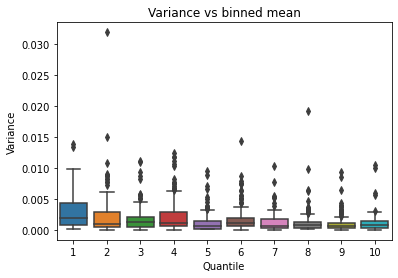

In [44]:
_temp_data= pd.DataFrame(data={'y':_updated_the_table_test.transpose().var(),'x':_updated_the_table_test.transpose().mean()})
_temp_data['mean_bin'] = pd.qcut(_temp_data['x'], q=10, labels=range(1,11))
fig, ax = plt.subplots(figsize=(6, 4))
# sns.scatterplot(data=_temp_data, x="mean_bin", y="y", s=8)
ax = sns.boxplot(x="mean_bin", y="y", data=_temp_data)
plt.xlabel("Quantile")
plt.ylabel("Variance")
plt.title("Variance vs binned mean")
plt.savefig("/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/suppl_test_mean_vs_score_var.pdf", format='pdf')


In [45]:
cutted_the_table_index = []
for i in _the_table.index.to_list():
    cutted_the_table_index.append("_".join(i.split('_')[1:]))
cutted_the_table_index

['no_no_sis',
 'no_grn4_sis',
 'no_grn4Cntl_sis',
 'no_grn5_sis',
 'no_grn5Cntl_sis',
 'no_grn1_sis',
 'no_grn1Cntl_sis',
 'no_grn2_sis',
 'no_grn2Cntl_sis',
 'no_grn3_logisticFwd',
 'no_grn3Cntl_logisticFwd',
 'no_grn3Cntl_sis',
 'no_zscore_sis',
 'no_zscore_cor_sis',
 'no_zscore_grn3_logisticFwd',
 'no_zscore_grn3Cntl_logisticFwd',
 'no_zscore_grn3Cntl_sis',
 'no_selectVcomExpHC_sis',
 'no_selectVcomExpHC_grn3_zscore_logisticFwd',
 'no_selectVcomExpHC_grn3_zscore_sis',
 'no_selectVcomExpHC_grn3_cor_logisticFwd',
 'no_selectVcomExpHC_grn3_cor_sis',
 'no_selectVcomExpHC_grn3_logisticFwd',
 'no_selectVcomExpHC_grn3_sis',
 'no_selectVcomExpHC_grn3Cntl_zscore_logisticFwd',
 'no_selectVcomExpHC_grn3Cntl_zscore_sis',
 'no_selectVcomExpHC_grn3Cntl_cor_logisticFwd',
 'no_selectVcomExpHC_grn3Cntl_cor_sis',
 'no_selectVcomExpHC_grn3Cntl_logisticFwd',
 'no_selectVcomExpHC_grn3Cntl_sis',
 'no_selectVcomExpHC_cor_sis',
 'no_selectVcomExpHC_cor_zscore_logisticFwd',
 'no_selectVcomExpHC_cor_zscore_s

In [46]:
sum([len(test_feature_method_dict[i]) for i in test_feature_method_dict if i in cutted_the_table_index])

3087

In [47]:
test_feature_table = pd.DataFrame(data={"test_feature": test_feature_classifier[0], 'test_roc':test_feature_classifier[1]})
print(test_feature_table.shape)
main_feature_table = pd.DataFrame(data={"main_feature": main_feature_classifier[0], 'main_roc':main_feature_classifier[1]})
print(main_feature_table.shape)
main_feature_table = main_feature_table[main_feature_table.main_feature.isin(test_feature_table.test_feature)]
main_feature_table = main_feature_table.sort_values(by="main_feature").reset_index(drop=True)
print(main_feature_table.shape)
test_feature_table = test_feature_table[test_feature_table.test_feature.isin(main_feature_table.main_feature)]
test_feature_table = test_feature_table.sort_values(by="test_feature").reset_index(drop=True)
print(test_feature_table.shape)
merged_table = pd.concat([test_feature_table, main_feature_table], axis=1).dropna()
merged_table = merged_table[~(merged_table == 0).any(axis=1)]

(19224, 2)
(15840, 2)
(15732, 2)
(15732, 2)


In [48]:
test_feature_table[test_feature_table.test_roc>0.8]

,test_feature,test_roc
2,cov_grn1Cntl_cppls@elasticNetLogReg,0.812144
3,cov_grn1Cntl_cppls@lassoLogReg,0.807400
6,cov_grn1Cntl_cppls@logReg,0.814042
7,cov_grn1Cntl_cppls@qda,0.810247
10,cov_grn1Cntl_cppls@ridgeLogReg,0.812144
...,...,...
15698,var_zscore_plsr@elasticNetLogReg,0.824478
15699,var_zscore_plsr@lassoLogReg,0.821632
15702,var_zscore_plsr@logReg,0.827324
15703,var_zscore_plsr@qda,0.817837


In [49]:
akk=main_feature_table[main_feature_table.main_roc>0.8].main_feature.to_list()
_count=0
for i in akk:
    if i.find('wgcna')!=-1:
        _count+=1
print(_count)
main_feature_table[main_feature_table.main_roc>0.8]

3


,main_feature,main_roc
614,cov_selectVcomExpHC_cor_cppls@elasticNetLogReg,0.811870
615,cov_selectVcomExpHC_cor_cppls@lassoLogReg,0.809518
616,cov_selectVcomExpHC_cor_cppls@lassoReg,0.807812
617,cov_selectVcomExpHC_cor_cppls@lda,0.807472
618,cov_selectVcomExpHC_cor_cppls@logReg,0.816562
...,...,...
15666,var_zscore_grn3_plsr@logReg,0.807433
15668,var_zscore_grn3_plsr@randomForest,0.810693
15669,var_zscore_grn3_plsr@reg,0.804307
15670,var_zscore_grn3_plsr@ridgeLogReg,0.809457


In [50]:
main_feature_table.main_feature.value_counts()

cov_var_no_plsr@lassoReg                                      1
varImportance_selectVnotComExpHC_grn3_zscore_plsr@qda         1
cov_var_selectVcomFair_logisticFwd@logReg                     1
varImportance_selectVcomExpHC_grn3Cntl_zscore_pcr@ridgeReg    1
no_selectVnotComFair_cor_no@lda                               1
                                                             ..
cov_zscore_pcr@boosting                                       1
varImportance_selectVcomExpHC_cor_plsr@bagging                1
cov_selectVcomHC_cor_pcr@randomForest                         1
var_selectVcomHC_grn3_cor_sis@lda                             1
cov_selectVnotComExpHC_cor_cppls@lda                          1
Name: main_feature, Length: 15732, dtype: int64

In [51]:
np.sort(merged_table[merged_table.main_roc>0.8].test_roc.values)

array([0.57495256, 0.58254269, 0.58444023, ..., 0.89278937, 0.89278937,
       0.89278937])

In [52]:
np.sort(merged_table.main_roc.values)

array([0.49945754, 0.50175279, 0.51585673, ..., 0.87247449, 0.87318967,
       0.8741877 ])

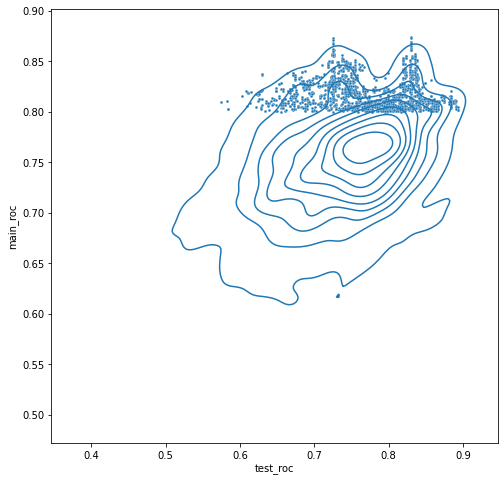

<Figure size 432x288 with 0 Axes>

In [53]:
import seaborn as sns
plt.subplots(figsize=(8, 8))
sns.scatterplot(data=merged_table[merged_table.main_roc>0.8], x="test_roc", y="main_roc", s=8)
sns.kdeplot(data=merged_table[["test_roc", "main_roc"]],  x="test_roc", y="main_roc")
plt.show()
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppx_1_au_roc_mainvstest.svg',format='svg')

(0.4, 0.9)

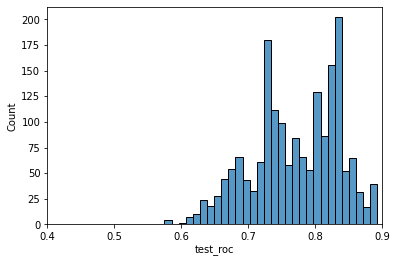

In [94]:
sns.histplot(merged_table[merged_table.main_roc>0.8].test_roc,bins=30)
plt.xlim([0.4,0.9])

(0.5, 0.9)

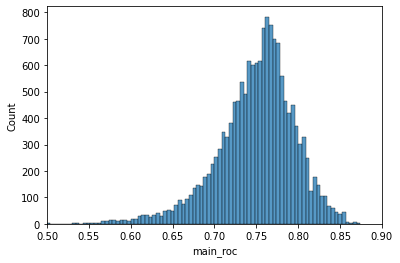

In [98]:
sns.histplot(merged_table.main_roc)
plt.xlim([0.5,0.9])

(0.4, 0.9)

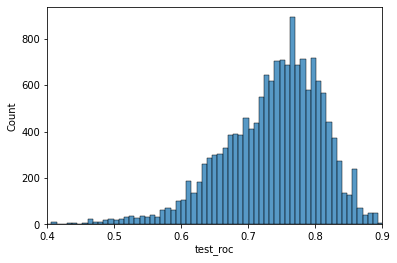

In [90]:
sns.histplot(merged_table.test_roc)
plt.xlim([0.4,0.9])

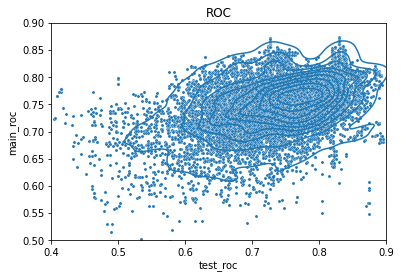

In [86]:
# plt.subplot(fig)
sns.scatterplot(data=merged_table, x="test_roc", y="main_roc", s=10)
sns.kdeplot(data=merged_table[["test_roc", "main_roc"]], x="test_roc", y="main_roc")
plt.title("ROC")
plt.xlim([0.4,0.9])
plt.ylim([0.5,0.9])
plt.show()

In [54]:
merged_table_high = merged_table[(merged_table.main_roc>0.8) & (merged_table.test_roc>0.8)]
merged_table_high = merged_table_high.reset_index(drop=True)
merged_table_high

,test_feature,test_roc,main_feature,main_roc
0,cov_selectVcomExpHC_cor_cppls@qda,0.818786,cov_selectVcomExpHC_cor_cppls@qda,0.800655
1,cov_selectVcomExpHC_cor_plsr@qda,0.818786,cov_selectVcomExpHC_cor_plsr@qda,0.800655
2,cov_selectVcomExpHC_cor_zscore_pcr@qda,0.817837,cov_selectVcomExpHC_cor_zscore_pcr@qda,0.802774
3,cov_selectVcomExpHC_cppls@elasticNetLogReg,0.836812,cov_selectVcomExpHC_cppls@elasticNetLogReg,0.828796
4,cov_selectVcomExpHC_cppls@lassoLogReg,0.831120,cov_selectVcomExpHC_cppls@lassoLogReg,0.832785
...,...,...,...,...
737,var_selectVnotComFair_sis@qda,0.821632,var_selectVnotComFair_sis@qda,0.805865
738,var_selectVnotComFair_sis@randomForest,0.802182,var_selectVnotComFair_sis@randomForest,0.804721
739,var_selectVnotComFair_sis@reg,0.830171,var_selectVnotComFair_sis@reg,0.834463
740,var_selectVnotComFair_sis@ridgeLogReg,0.838710,var_selectVnotComFair_sis@ridgeLogReg,0.834904


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


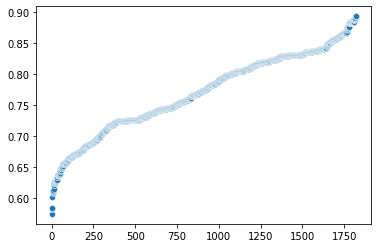

In [55]:
sns.scatterplot(range(len(merged_table[merged_table.main_roc>0.8].test_roc)),sorted(list(merged_table[merged_table.main_roc>0.8].test_roc.values)))

### test features

Text(0.5, 0, '# of model from one route that have AUC>0.8 in training and AUC>0.75 in test')

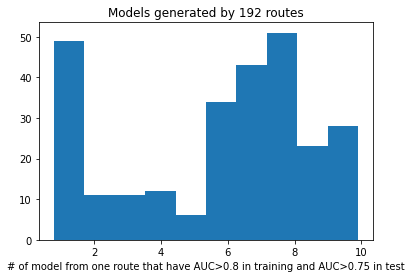

In [57]:
merged_table_test = merged_table[merged_table.main_roc>0.8]
merged_table_test = merged_table_test.reset_index(drop=True)

merged_table_test.shape
overlapped_route = merged_table_test.main_feature.tolist()
overlapped_route_dict = {}
model_count = {}
model_score = {}
for idex,i in enumerate(overlapped_route):
    _route, _method = i.split('@')
    if _route not in overlapped_route_dict.keys():
        overlapped_route_dict[_route] = [_method]
        model_count[_route] = 1
        model_score[_route] = merged_table_test.loc[idex, 'main_roc']
    else:
        overlapped_route_dict[_route].append(_method)
        model_count[_route] += 1
        model_score[_route] += merged_table_test.loc[idex, 'main_roc']
        
overlapped_route_dict
counts_list = []
for i in model_count:
    counts_list.append(model_count[i])
score_count=[]
for i in model_score:
    score_count.append(model_score[i])
plt.hist(score_count)
plt.title("Models generated by 192 routes")
plt.xlabel('# of model from one route that have AUC>0.8 in training and AUC>0.75 in test')

In [58]:
sum(counts_list)

1822

In [59]:
overlapped_route = merged_table_high.main_feature.tolist()

In [60]:
merged_table_high.loc[0, 'test_roc']

0.8187855787476279

In [61]:
overlapped_route_dict = {}
model_count = {}
model_score = {}
for idex,i in enumerate(overlapped_route):
    _route, _method = i.split('@')
    if _route not in overlapped_route_dict.keys():
        overlapped_route_dict[_route] = [_method]
        model_count[_route] = 1
        model_score[_route] = merged_table_high.loc[idex, 'main_roc']
    else:
        overlapped_route_dict[_route].append(_method)
        model_count[_route] += 1
        model_score[_route] += merged_table_high.loc[idex, 'main_roc']
        
overlapped_route_dict
counts_list = []
for i in model_count:
    counts_list.append(model_count[i])
score_count = []
for i in model_score:
    score_count.append(model_score[i])

Text(0.5, 0, '# of model from one route that have AUC>0.8 in training and AUC>0.75 in test')

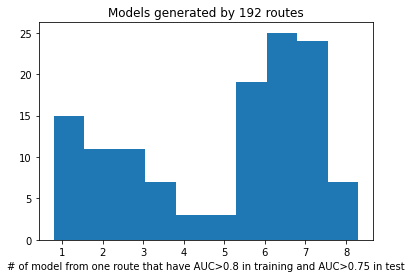

In [62]:
import seaborn as sns

plt.hist(score_count)
plt.title("Models generated by 192 routes")
plt.xlabel('# of model from one route that have AUC>0.8 in training and AUC>0.75 in test')
# plt.xlim([0,13])

(0.0, 13.0)

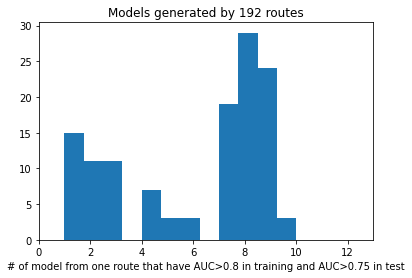

In [63]:
import seaborn as sns
plt.hist(counts_list, bins=12)
plt.title("Models generated by 192 routes")
plt.xlabel('# of model from one route that have AUC>0.8 in training and AUC>0.75 in test')
plt.xlim([0,13])
# plt.savefig('/Wo')

In [64]:
#
class gene_share:
    def __init__(self, method, list_test, list_training):
        """list_test is a 2-d lst;
        list_trainning is also a 2-d list
        """
        self.method=method
        self.test_gene = list_test[0]
        self.overlap_count_dict = {}
        for i in self.test_gene:
            self.overlap_count_dict[i] = 0
        self.training_gene_count = {}
        self.training_gene = list(chain.from_iterable(list_training))
        for i in self.training_gene:
            self.training_gene_count[i] = 0
        self.exist_iter = len(list_training)
        self.total_number = len(set(self.test_gene))
        
        self.gene_weight = 0
        self.count_exist()
        
    def count_exist(self):
        for i in self.training_gene:
            if i in self.test_gene:
                self.overlap_count_dict[i] += 1/self.exist_iter
            self.training_gene_count[i] += 1/self.exist_iter
#         return self.count_dict
        _temp_weight = 0
#         print(self.count_dict)
        for i in self.overlap_count_dict.keys():
#             print(self.count_dict[i])
            _temp_weight += self.overlap_count_dict[i]/self.total_number
        self.gene_weight = _temp_weight
        
    def overlapped_high(self):
        "overlap/overlap high"
        return len(self.get_overlapped_high_test_gene())/len(self.get_overlapped_test_gene())
        
    def overlapped_all(self):
        return len(list(self.overlap_count_dict.keys()))/len(list(self.training_gene_count.keys()))
    
    def get_count_dict(self):
        return self.overlap_count_dict
    
    def get_high_training_gene(self):
        """return gene that have 0.5 more in 5-fold cross validation"""
        return_lst = [i for i in self.training_gene_count.keys() if self.training_gene_count[i]>0.5]
        return return_lst
    
    def get_overlapped_all_test_gene(self):
        """return gene that have all in the overlapped"""
        return_lst = [i for i in self.overlap_count_dict.keys() if self.overlap_count_dict[i]>0.9]
        return return_lst
    
    def get_overlapped_high_test_gene(self):
        """return gene that have 4/5 more in the overlapped"""

        return_lst = [i for i in self.overlap_count_dict.keys() if self.overlap_count_dict[i]>0.7]
        return return_lst
    
    def get_overlapped_mid_test_gene(self):
        """return gene that have 3/5 more in the overlapped"""
        return_lst = [i for i in self.overlap_count_dict.keys() if self.overlap_count_dict[i]>0.5]
        return return_lst
    
    def get_overlapped_test_gene(self):
        return_lst = [i for i in self.overlap_count_dict.keys() if self.overlap_count_dict[i]>0]
        return return_lst
    def get_all_training_gene(self):
#         print(list(set(self.training_gene)))
        return list(set(self.training_gene))
    
    def get_all_test_gene(self):
        return list(set(self.test_gene))
    
    def get_gene_weight(self):
        return self.gene_weight
    
    



In [65]:
%matplotlib inline

In [66]:
from itertools import chain
feature_list = []
classifier_used = []
overlapped_all_dict = {}
overlapped_high_dict = {}
overlapped_mid_dict = {}
overlapped_dict = {}
test_all_dict = {}
overlapped_route_dict_list = list(overlapped_route_dict.keys())
training_all_dict = {}
# print(count)
count = 0

feature_length = []
for i in overlapped_route_dict_list:
    if i not in test_temp_dict.keys() or i not in temp_dict.keys():
        print(i)
        continue
#     if i.find('plsr') != -1 or i.find('pcr') != -1:
#         count += 1
#     elif i.find('cppls') != -1 :
#         continue
# #     print(i)
#     print(test_temp_dict[i])
    
    _temp = gene_share(i, test_temp_dict[i], temp_dict[i])
    feature_length.append( _temp.total_number)
#     print(_temp.)
#     if _temp.total_number<5:
#         print(test_temp_dict[i])
#         print( temp_dict[i])
    feature_list.append(_temp.get_gene_weight())
#     print(_temp.get_gene_weight())
#     print(feature_index_dict_method[i])
#     print(_temp.get_count_dict())
#     print("Overlap high",_temp.overlapped_high())
#     print("Overlap all",  _temp.overlapped_all())
#     print("get_all_training_gene", len(_temp.get_all_training_gene()))
#     print("get_high_training_gene", len(_temp.get_high_training_gene()))
#     print("get_overlapped_test_gene", len(_temp.get_overlapped_test_gene()))
#     print("overlapped_high", _temp.overlapped_high())
#     print("get_all_test_gene", len(_temp.get_all_test_gene()))
#     print("overlap_over_test_ratio", _temp.get_overlap_test_ratio())
#     print("get_all_test_gene",len(_temp.get_all_test_gene()))
    overlapped_all_dict[i] = _temp.get_overlapped_all_test_gene()
    overlapped_high_dict[i] = _temp.get_overlapped_high_test_gene()
    overlapped_mid_dict[i] = _temp.get_overlapped_mid_test_gene()
    overlapped_dict[i] = _temp.get_overlapped_test_gene()
    test_all_dict[i] = _temp.get_all_test_gene()
    training_all_dict[i] = _temp.get_all_training_gene()

## testing the feature similarity

## checking the gene in test_all_name_list

In [67]:
test_all_dict

{'cov_selectVcomExpHC_cor_cppls': ['55893',
  '6691',
  '25909',
  '387837',
  '3597',
  '55647',
  '9021',
  '643550',
  '23741',
  '10384',
  '51559',
  '79658',
  '90378',
  '84166',
  '79651',
  '284023',
  '94120',
  '85395',
  '375341',
  '140459',
  '165631',
  '57161',
  '55752',
  '114294',
  '2999',
  '8427',
  '9121',
  '717',
  '3755',
  '55092',
  '26119',
  '116988',
  '91373',
  '1831',
  '118788',
  '1675',
  '311',
  '51557',
  '150094',
  '220042',
  '389015',
  '8644',
  '1050',
  '27106',
  '3305',
  '57458',
  '139105',
  '9254',
  '1912',
  '647074',
  '1380',
  '10219',
  '653080',
  '1822',
  '7128',
  '79866',
  '340307',
  '440871',
  '90407',
  '140707',
  '26157',
  '10965',
  '5730',
  '9846',
  '729021',
  '9454',
  '5729',
  '22859',
  '115004',
  '58528',
  '773',
  '283871',
  '1762',
  '81',
  '10477',
  '5984',
  '9111',
  '57187',
  '55313',
  '29922',
  '4496',
  '4090',
  '93129',
  '400077',
  '112487',
  '79616',
  '463',
  '55086',
  '3613',
  '

In [71]:
gene_existence_table[gene_existence_table.index.isin(test_all_dict.keys())]

,9638,220042,10643,115004,3613,6256,163732,23492,359845,57118,...,79594,9766,85395,23325,28996,85464,64425,728,80896,50808
cov_selectVcomExpHC_cor_cppls,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cov_selectVcomExpHC_cor_plsr,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cov_selectVcomExpHC_cor_zscore_pcr,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
cov_selectVcomExpHC_cppls,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
cov_selectVcomExpHC_grn3_cor_no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_selectVnotComFair_cppls,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_selectVnotComFair_logisticFwd,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_selectVnotComFair_no,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_selectVnotComFair_plsr,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
gene_existence_table= pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/500_top_gene_existence_table.csv",index_col=0)
gene_existence_table=gene_existence_table[gene_existence_table.index.isin(test_all_dict.keys())]
first_500_gene = gene_existence_table.columns.to_list()
the_similarity_table = np.zeros((len(test_all_dict), len(test_all_dict)))
test_all_name_list = sorted(list(test_all_dict.keys()))
gene_existence_array = np.zeros((len(test_all_name_list), 500))
for idex,i in enumerate(test_all_name_list):
#     for gdex, gene in enumerate(first_500_gene):
#         if gene in training_all_dict[i]:
#             gene_existence_array[idex, gdex]=1
            
    for jdex,j in enumerate(test_all_name_list):
        the_length = len(np.intersect1d(test_all_dict[i], test_all_dict[j]))
        the_overlap = (the_length+1)/(len(test_all_dict[i])+1) * ((the_length+1)/(len(test_all_dict[j])+1))
        if the_overlap>1:
            print(the_length, len(test_all_dict[i]), len(test_all_dict[j]))
        if np.isnan(the_overlap):
            print('a')
        the_similarity_table[idex, jdex] = the_overlap
        
the_similarity_table = pd.DataFrame(the_similarity_table, columns=test_all_name_list, index=test_all_name_list)
keep = np.triu(np.ones(the_similarity_table.shape)).astype('bool').reshape(the_similarity_table.size)
_simi = the_similarity_table.stack()[keep]

# gene_existence_table = pd.DataFrame(data=gene_existence_array, index=test_all_name_list, columns=first_500_gene)

simi_euc_var = gene_existence_table.index.to_list()
from scipy.spatial.distance import euclidean, pdist, squareform, cosine, cityblock

simidists = pdist(gene_existence_table, euclidean)
simi_euclid = pd.DataFrame(squareform(simidists), columns=simi_euc_var, index=simi_euc_var)

In [73]:
gene_existence_table.shape

(125, 500)

# 125 routes

In [74]:
f1 = ['no', 'cov_var', 'cov', 'varImportance', 'var']
f2 = ['no', 'grn', 'selectV', 'zscore', 'svm', 'GSEA','DE']
f3 = ['no', 'plsr', 'pcr', 'cppls', 'wgcna', 'logisticFwd','sis']
main_route_list = test_all_name_list
# ['no', 'cov', 'var', 'cor_var', 'varImportance']
# ['no', 'cov', 'var', 'cor_var', 'varImportance']
feature_1 = [0]*5
feature_2 = [0]*7
feature_3 = [0]*7
for i in main_route_list:
    _found = False
    for p1dex,p1 in enumerate(f1): 
#         print(p1)
        if i.startswith(p1):
            feature_1[p1dex] += 1
            temp = i[len(p1)+1:]
            _found = True
            break
    assert _found,'round1'
    _found = False
    for p2dex,p2 in enumerate(f2): 
        if temp.startswith(p2):
            feature_2[p2dex] += 1
            _found = True
            break
    assert _found,'round2 '+i+" "+temp
    _found = False
    for p3dex,p3 in enumerate(f3): 
        if i.endswith(p3):
            feature_3[p3dex] += 1
            _found = True
            break
    assert _found,'round3'

pd.DataFrame(data=[feature_1, feature_2,feature_3]).transpose()
pd.DataFrame(data=[f1, f2,f3]).transpose()

,0,1,2
0,no,no,no
1,cov_var,grn,plsr
2,cov,selectV,pcr
3,varImportance,zscore,cppls
4,var,svm,wgcna
5,None,GSEA,logisticFwd
6,None,DE,sis


# Similarity table

(125, 125)


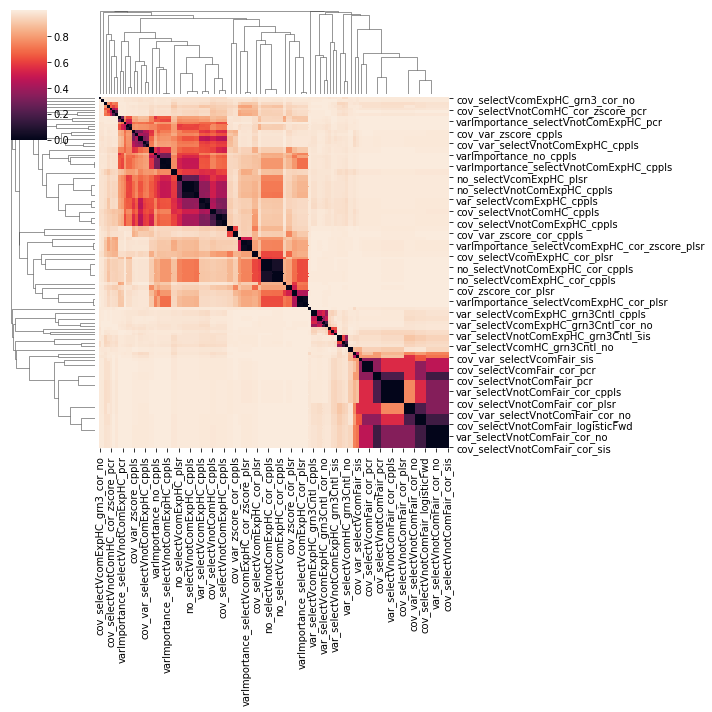

In [75]:
# simidists = pdist(gene_existence_table, euclidean)
# simi_euclid = pd.DataFrame(squareform(simidists), columns=simi_euc_var, index=simi_euc_var)
# gene_existence_array = _gene_existence_table.transpose().corr(method='pearson')
# keep_corr = np.triu(np.ones(gene_existence_array.shape)).astype('bool').reshape(gene_existence_array.size)
# simi_cor = gene_existence_array.stack()[keep_corr]
import pandas as pd, seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
# from sklearn.datasets import load_iris
DF_dism = 1 - the_similarity_table   # distance matrix
print(DF_dism.shape)
DF_dism.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/route_similarity_125.csv')
linkage = hc.linkage(sp.distance.squareform(DF_dism), method='average')
sns.clustermap(DF_dism, row_linkage=linkage, col_linkage=linkage)

plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_3_routes_500.pdf', format='pdf')

## checking the gene in all test_routes

In [76]:
_the_similarity_table = np.zeros((len(test_all_name_list), len(test_all_dict)))
# _test_all_name_list = sorted(list(test_temp_dict.keys()))
_gene_existence_array = np.zeros((len(test_all_name_list), 500))
for idex,i in enumerate(test_all_name_list):
    for gdex, gene in enumerate(first_500_gene):
        if gene in test_temp_dict[i][0]:
            _gene_existence_array[idex, gdex] = 1
        
# the_similarity_table = pd.DataFrame(the_similarity_table, columns=test_all_name_list, index=test_all_name_list)
# keep = np.triu(np.ones(the_similarity_table.shape)).astype('bool').reshape(the_similarity_table.size)
# _simi = the_similarity_table.stack()[keep]

_gene_existence_table = pd.DataFrame(data=_gene_existence_array, index=test_all_name_list, columns=first_500_gene)
_gene_existence_table

,9638,220042,10643,115004,3613,6256,163732,23492,359845,57118,...,79594,9766,85395,23325,28996,85464,64425,728,80896,50808
cov_selectVcomExpHC_cor_cppls,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cov_selectVcomExpHC_cor_plsr,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cov_selectVcomExpHC_cor_zscore_pcr,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cov_selectVcomExpHC_cppls,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
cov_selectVcomExpHC_grn3_cor_no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_selectVnotComFair_cppls,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_selectVnotComFair_logisticFwd,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_selectVnotComFair_no,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_selectVnotComFair_plsr,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


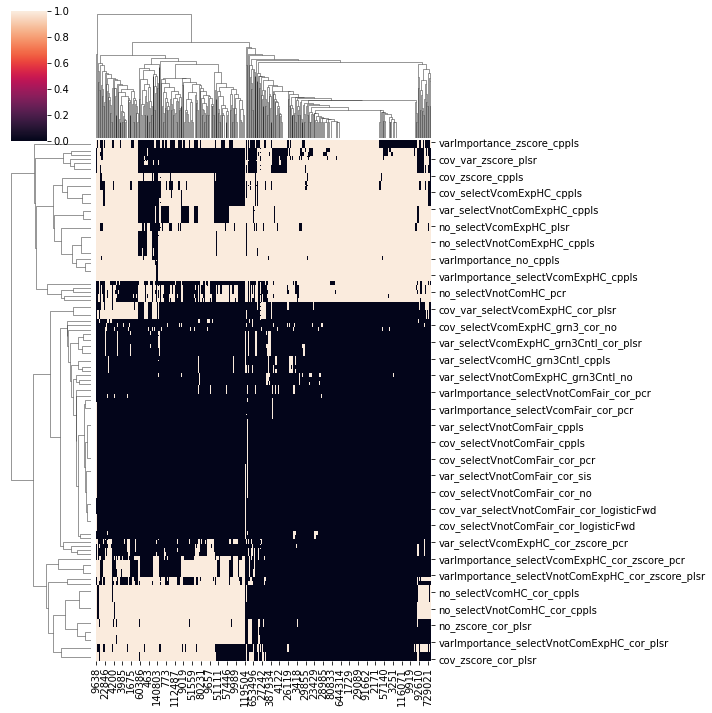

In [77]:
sns.clustermap(_gene_existence_table)
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_3_routes_500.pdf', format='pdf')

In [78]:
import copy 
_reindex_the_table_test = copy.deepcopy(_the_table_test)
_reindex_the_table_test.index = ['_'.join(i.split('_')[1:]) for i in _reindex_the_table_test.index.to_list()]
_reindex_the_table_test = _reindex_the_table_test[_reindex_the_table_test.index.isin(test_all_dict.keys())]
_reindex_the_table_test = _reindex_the_table_test.transpose()
_reindex_the_table_test = _reindex_the_table_test[sorted(_reindex_the_table_test.columns.to_list())]

In [79]:
DF_var = _reindex_the_table_test.columns.to_list()
from scipy.spatial.distance import euclidean, pdist, squareform, cosine, cityblock

dists = pdist(_reindex_the_table_test.transpose(), cityblock)
DF_city = pd.DataFrame(squareform(dists), columns=DF_var, index=DF_var)

In [80]:
_reindex_the_table_test_cor = _reindex_the_table_test.corr(method='spearman')
keep_corr = np.triu(np.ones(_reindex_the_table_test_cor.shape)).astype('bool').reshape(_reindex_the_table_test_cor.size)
_cor = _reindex_the_table_test_cor.stack()[keep_corr]

DF_var = _reindex_the_table_test.columns.to_list()
cosine_dists = pdist(_reindex_the_table_test.transpose(), cosine)
cosine_dists_table = pd.DataFrame(squareform(cosine_dists), columns=DF_var, index=DF_var)
keep_cosine = np.triu(np.ones(cosine_dists_table.shape)).astype('bool').reshape(cosine_dists_table.size)
_cos = cosine_dists_table.stack()[keep_cosine]


# similarity
from scipy.spatial.distance import euclidean, pdist, squareform, cosine, cityblock

dists = pdist(_reindex_the_table_test.transpose(), euclidean)
DF_euclid = pd.DataFrame(squareform(dists), columns=DF_var, index=DF_var)
keep_euc = np.triu(np.ones(DF_euclid.shape)).astype('bool').reshape(DF_euclid.size)
_euc = DF_euclid.stack()[keep_euc]

simi_euc = np.triu(np.ones(simi_euclid.shape)).astype('bool').reshape(simi_euclid.size)

simi_euc = simi_euclid.stack()[simi_euc]

model_simi=pd.DataFrame({'simi':_simi, 'cor':_cor, 'simi_log':-np.log2(_simi),
                         'euc':_euc, 'simi_euc':simi_euc,  'cos':_cos})

model_simi['cbin_simi_log'] = pd.cut(model_simi['simi_log'], bins=[-0.01, 1,2,3,4,5,6,7,8,9, 10, 11, 12, 13], labels=range(0, 13))

# model_simi

In [81]:
sum(feature_1_main)

2301

In [82]:
model_simi

simi  \
cov_selectVcomExpHC_cor_cppls cov_selectVcomExpHC_cor_cppls       1.000000   
                              cov_selectVcomExpHC_cor_plsr        1.000000   
                              cov_selectVcomExpHC_cor_zscore_pcr  0.143275   
                              cov_selectVcomExpHC_cppls           0.205005   
                              cov_selectVcomExpHC_grn3_cor_no     0.026671   
...                                                                    ...   
var_selectVnotComFair_no      var_selectVnotComFair_plsr          0.666667   
                              var_selectVnotComFair_sis           1.000000   
var_selectVnotComFair_plsr    var_selectVnotComFair_plsr          1.000000   
                              var_selectVnotComFair_sis           0.666667   
var_selectVnotComFair_sis     var_selectVnotComFair_sis           1.000000   

                                                                       cor  \
cov_selectVcomExpHC_cor_cppls cov_selectVcomExpHC_cor_cppls       1.000000   
                              cov_selectVcomExpHC_cor_plsr        0.907904   
                              cov_selectVcomExpHC_cor_zscore_pcr  0.270669   
                              cov_selectVcomExpHC_cppls           0.565698   
                              cov_selectVcomExpHC_grn3_cor_no    -0.290046   
...                                                                    ...   
var_selectVnotComFair_no      var_selectVnotComFair_plsr          0.953224   
                              var_selectVnotComFair_sis           0.998225   
var_selectVnotComFair_plsr    var_selectVnotComFair_plsr          1.000000   
                              var_selectVnotComFair_sis           0.954919   
var_selectVnotComFair_sis     var_selectVnotComFair_sis           1.000000   

                                                                  simi_log  \
cov_selectVcomExpHC_cor_cppls cov_selectVcomExpHC_cor_cppls      -0.000000   
                              cov_selectVcomExpHC_cor_plsr       -0.000000   
                              cov_selectVcomExpHC_cor_zscore_pcr  2.803143   
                              cov_selectVcomExpHC_cppls           2.286266   
                              cov_selectVcomExpHC_grn3_cor_no     5.228562   
...                                                                    ...   
var_selectVnotComFair_no      var_selectVnotComFair_plsr          0.584963   
                              var_selectVnotComFair_sis          -0.000000   
var_selectVnotComFair_plsr    var_selectVnotComFair_plsr         -0.000000   
                              var_selectVnotComFair_sis           0.584963   
var_selectVnotComFair_sis     var_selectVnotComFair_sis          -0.000000   

                                                                       euc  \
cov_selectVcomExpHC_cor_cppls cov_selectVcomExpHC_cor_cppls       0.000000   
                              cov_selectVcomExpHC_cor_plsr        0.018008   
                              cov_selectVcomExpHC_cor_zscore_pcr  0.113877   
                              cov_selectVcomExpHC_cppls           0.138619   
                              cov_selectVcomExpHC_grn3_cor_no     0.221456   
...                                                                    ...   
var_selectVnotComFair_no      var_selectVnotComFair_plsr          0.042212   
                              var_selectVnotComFair_sis           0.010973   
var_selectVnotComFair_plsr    var_selectVnotComFair_plsr          0.000000   
                              var_selectVnotComFair_sis           0.047193   
var_selectVnotComFair_sis     var_selectVnotComFair_sis           0.000000   

                                                                   simi_euc  \
cov_selectVcomExpHC_cor_cppls cov_selectVcomExpHC_cor_cppls        0.000000   
                              cov_selectVcomExpHC_cor_plsr         0.000000   
                              cov_selectVcomExpHC_cor_zscore_pcr  11.357817   
      

# Suppl_6_routes_similarity_cor

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


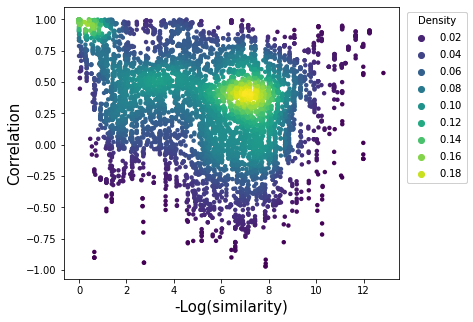

<Figure size 432x288 with 0 Axes>

In [83]:
# Generate fake data
x = model_simi["simi_log"]
y = model_simi["cor"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize=(6, 5))
scatter = ax.scatter(x, y, c=z, s=20, edgecolor='')
#     plt.show()
handles, labels = scatter.legend_elements(prop="colors", alpha=1)
legend2 = ax.legend(handles, labels, bbox_to_anchor = (1.01, 1), title="Density")
ax.add_artist(legend2)
plt.xlabel('-Log(similarity)', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.show()
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_6_routes_similarity_cor.pdf', format='pdf')


# Suppl_6_routes_similarity_eucli

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


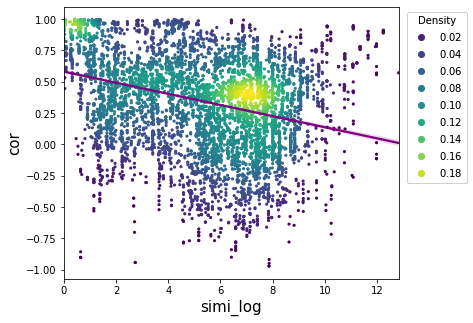

In [84]:
# Generate fake data
x = model_simi["simi_log"]
y = model_simi["cor"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize=(6, 5))
scatter = ax.scatter(x, y, c=z, s=10, edgecolor='')
#     plt.show()
handles, labels = scatter.legend_elements(prop="colors", alpha=1)
legend2 = ax.legend(handles, labels, bbox_to_anchor = (1.01, 1), title="Density")
ax.add_artist(legend2)
plt.xlabel('-Log(similarity)', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
# plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)))
# ax.plot(x.values.reshape(-1,1), response, color='k', label='Regression model')
sns.regplot(x="simi_log", y="cor", data=model_simi,fit_reg=True, x_estimator=np.mean, ci=95, ax=ax, scatter=False, color= 'purple')

# plt.show()
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_6_routes_similarity_cor.svg', format='svg')

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
# x= model_simi['cbin_simi_log'].values.reshape(-1,1)
# ols = linear_model.LinearRegression()
# model = ols.fit(x, y)
# response = model.predict(x)
# r2 = model.score(x, y)
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot(x, response, color='k', label='Regression model')
the_result = stats.linregress(model_simi['cbin_simi_log'].values, model_simi['cor'].values)
the_result

LinregressResult(slope=-0.043211420683120935, intercept=0.5544437894337308, rvalue=-0.30791382467933703, pvalue=1.4762976883691267e-172, stderr=0.0015047657002512185)

In [86]:
model_simi['cbin_simi_log']

cov_selectVcomExpHC_cor_cppls  cov_selectVcomExpHC_cor_cppls         0
                               cov_selectVcomExpHC_cor_plsr          0
                               cov_selectVcomExpHC_cor_zscore_pcr    2
                               cov_selectVcomExpHC_cppls             2
                               cov_selectVcomExpHC_grn3_cor_no       5
                                                                    ..
var_selectVnotComFair_no       var_selectVnotComFair_plsr            0
                               var_selectVnotComFair_sis             0
var_selectVnotComFair_plsr     var_selectVnotComFair_plsr            0
                               var_selectVnotComFair_sis             0
var_selectVnotComFair_sis      var_selectVnotComFair_sis             0
Name: cbin_simi_log, Length: 7875, dtype: category
Categories (13, int64): [0 < 1 < 2 < 3 ... 9 < 10 < 11 < 12]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


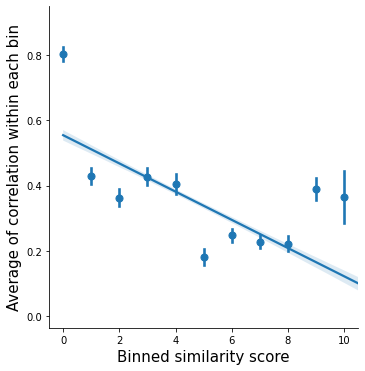

In [87]:
# pd.qcut(model_simi['simi_euc'], q=4)
# model_simi['bin_simi_euc'] = pd.qcut(model_simi['simi_euc'], q=25, labels=range(1,26))
# model_simi['bin_simi_euc_2'] = pd.qcut(model_simi['simi_euc'], q=10, labels=range(1,11))
# model_simi['bin_simi'] = pd.qcut(model_simi['euc'], q=10, labels=range(1,11))
# model_simi['bin_simi_log'] = pd.qcut(model_simi['simi_log'], q=10, labels=range(1,11))


# sns.lmplot(x="bin_simi_euc", y="cor", data=model_simi, x_estimator=np.mean, size=5)
# plt.xlabel('Quantile', fontsize=15)
# plt.ylabel('Average of correlation within each bin', fontsize=15)
# plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/Suppl_6_routes_binned_similarity_cor.pdf', format='pdf')
# plt.show()

sns.lmplot(x="cbin_simi_log", y="cor", data=model_simi, x_estimator=np.mean, size=5)
plt.xlabel('Binned similarity score', fontsize=15)
plt.ylabel('Average of correlation within each bin', fontsize=15)
plt.xlim((-0.5, 10.5))
plt.savefig('/Volumes/Work/Vahid_work/classification_newcode_data/Figure_output/Suppl_6_routes_binned_similarity_cor.svg', format='svg')
plt.show()

(array([ 7.,  9.,  0.,  0., 23., 36., 22., 14.,  5.,  9.]),
 array([0.05      , 0.13833333, 0.22666667, 0.315     , 0.40333333,
        0.49166667, 0.58      , 0.66833333, 0.75666667, 0.845     ,
        0.93333333]),
 <a list of 10 Patch objects>)

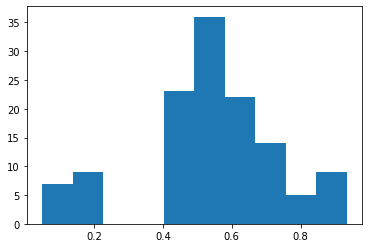

In [88]:
import matplotlib.pyplot as plt
plt.hist(feature_list)

In [89]:
def get_score(_dict, get_score=None, use_score=False):
    _score_dict = {}
#     _dict = overlapped_all_dict
    for i in _dict.keys():
        for _gene in _dict[i]:
            if use_score:
                if _gene not in _score_dict.keys():
                    _score_dict[_gene] = get_score[i]
                else:
                    _score_dict[_gene] += get_score[i]
            else:
                if _gene not in _score_dict.keys():
                    _score_dict[_gene] = 1
                else:
                    _score_dict[_gene] += 1
    _list_key = list(_score_dict.keys())
    _temp_table = pd.DataFrame(data={'gene':_list_key, 'counts':[_score_dict[i] for i in _list_key]}, )
    _temp_table = _temp_table.sort_values('counts', ascending=False)
    _temp_table = _temp_table.reset_index(drop=True)
    _temp_table.columns = ['geneName','score']
#     print(_temp_table.head())
    return _temp_table


In [90]:
overlapped_score_table = get_score(overlapped_dict, model_score)
overlapped_all_score_table = get_score(overlapped_all_dict, model_score)
test_score_table = get_score(test_all_dict, model_score)
training_score_table = get_score(training_all_dict, )


In [91]:
de_gene=pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/de_main_goodClassification_without_rank_001_logfc01.txt')

In [92]:
test_score_table[test_score_table.geneName.isin(de_gene.x.astype(str))].to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/de_in_features.txt', sep='\t')

In [93]:
de_gene.shape

(1185, 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


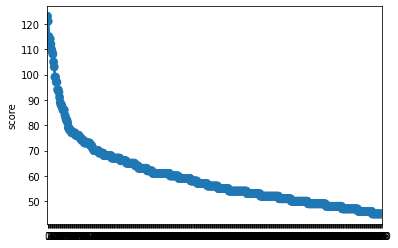

In [94]:
sns.pointplot(x=training_score_table.head(500).index, y=training_score_table.head(500).score)
training_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/trainning_gene_500.txt', sep=' ',index=False)
training_score_table.head(500).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/trainning_gene_score_500.txt', sep=' ', index=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


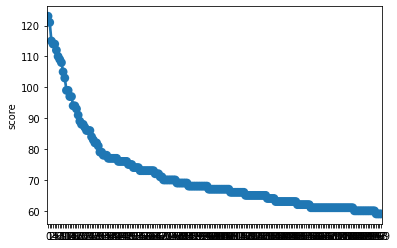

In [95]:
sns.pointplot(x=training_score_table.head(200).index, y=training_score_table.head(200).score)
training_score_table.head(200).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/trainning_gene_200.txt', index=False)
training_score_table.head(200).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/trainning_gene_score_200.txt', index=False)


In [109]:
# sns.pointplot(x=training_score_table.head(200).index, y=training_score_table.head(200).score)
# training_score_table.head(200).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/trainning_gene_200.txt', index=False)
# training_score_table.head(200).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/trainning_gene_score_200.txt', index=False)


In [110]:
_vahid_gene = [9638,220042,10461,10788,1545,115004,3613,3755,311,10023,163732,2947,441168,54741,55022,57118,57595,5996,80790,84166,8644,10219,7704,112770,1675,26519,2946,359845,54541,5730,8857,140803,2999,10598,2275,3458,2026,55893,200014,25849,3985,8904,9619,8111,128553]
len(_vahid_gene)

45

In [146]:
def get_int_geneName(_table):
    return [int(i) for i in _table.geneName.to_list()]

In [112]:
# sns.pointplot(x=test_score_table.head(500).index,y=test_score_table.head(500).score)

In [126]:
# sns.pointplot(x=complete_score_table.head(500).index,y=complete_score_table.head(500).score)
# complete_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_complete_gene_500.txt', index=False)
# complete_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_complete_500.txt', index=False)
test_score_table[test_score_table.score>10]

,geneName,score
0,9638,106
1,220042,78
2,3613,77
3,115004,77
4,359845,72
...,...,...
1447,9170,11
1448,23433,11
1449,1820,11
1450,79034,11


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


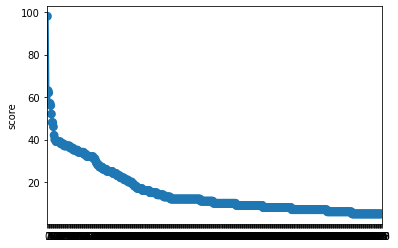

In [147]:
sns.pointplot(x=overlapped_all_score_table.head(500).index,y=overlapped_all_score_table.head(500).score)
overlapped_all_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_overlapall_gene_500.txt', index=False)
overlapped_all_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_overlapall_500.txt', index=False)


In [148]:
test_score_table.shape

(3087, 2)

In [149]:
test_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_500_gene.txt', index=False)
test_score_table.head(500).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_table_500.txt', index=False, sep=' ')

test_score_table.head(1000).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_1000_gene.txt', index=False)
test_score_table.head(1000).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_table_1000.txt', index=False, sep=' ')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [150]:
test_score_table.geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_all_gene.txt', index=False)
test_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_all_score_table_all.txt', index=False, sep=' ')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [151]:
all_score_table.head(300).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/all_gene_rocWeight_300.txt', index=False)
all_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/all_table_rocWeight_all.txt', index=False)


NameError: name 'all_score_table' is not defined

In [ ]:
# complete_score_table.head(300).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_gene_rocWeight_300.txt', index=False)
# # complete_score_table.head(300).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_score_table_up1000.txt')
# complete_score_table.head(500).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_gene_rocWeight_500.txt', index=False)
# complete_score_table.head(1000).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_gene_rocWeight_1000.txt', index=False)
# complete_score_table.head(300).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_table_rocWeight_300.txt', index=False)
# # complete_score_table.head(300).geneName.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_score_table_up1000.txt')
# complete_score_table.head(500).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_table_rocWeight_500.txt', index=False)
# complete_score_table.head(1000).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/complete_table_rocWeight_1000.txt', index=False)


In [154]:
# from venn import venn
# %matplotlib inline
# gene_dict = {
#     "complete_score_table": set(complete_score_table.head(100).geneName),
#     "test_score_table": set(test_score_table.head(100).geneName),
#     "high_score_table": set(high_score_table.head(100).geneName),
#     'all_score_table':set(all_score_table.head(100).geneName)
# }
# venn(gene_dict)

In [ ]:
# complete_score_table_40[complete_score_table_40.gene.isin(complete_score_table_40.gene)].shape

In [ ]:
vahid_table = pd.read_excel('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/data_supplementary/Progress_tracker.xlsx',sheet_name='Sheet2')
vahid_table.head()

In [ ]:
print(test_score_table_45[test_score_table_45.gene.isin(vahid_table.id)].shape)
print(all_score_table_45[all_score_table_45.gene.isin(vahid_table.id)].shape)
print(high_score_table_45[high_score_table_45.gene.isin(vahid_table.id)].shape)
print(mid_score_table_45[mid_score_table_45.gene.isin(vahid_table.id)].shape)
# print(complete_score_table_45[complete_score_table_45.gene.isin(vahid_table.id)].shape)

In [ ]:
xp_network = pd.read_csv('/Volumes/Work/r_note/asd_transcriptional_organization-master/rawData/networks/XP_networks/rawData/XP_func_anno.csv')
print(xp_network[xp_network['Entrez Gene ID'].isin(test_score_table.head(100).gene)].shape)
print(xp_network[xp_network['Entrez Gene ID'].isin(all_score_table.head(100).gene)].shape)
print(xp_network[xp_network['Entrez Gene ID'].isin(high_score_table.head(100).gene)].shape)
print(xp_network[xp_network['Entrez Gene ID'].isin(mid_score_table.head(100).gene)].shape)
# print(xp_network[xp_network['Entrez Gene ID'].isin(complete_score_table.head(100).gene)].shape)

In [ ]:
# name_prefix = 'complete_score_table_'
# for i in [50,100,500,1000]:
#     complete_score_table.head(i).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/'+name_prefix+str(i)+'.csv')
# name_prefix = 'all_score_table_'
# for i in [50,100,500,1000]:
#     all_score_table.head(i).to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/'+name_prefix+str(i)+'.csv')
      
        

In [ ]:
# np.median(complete_score_table.counts)

In [ ]:
# name_prefix = 'all_score_table_'
# all_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/'+name_prefix+'all.csv')

In [ ]:
# name_prefix = 'complete_score_table_'

# complete_score_table.to_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_result_plot/'+name_prefix+'all.csv')

In [ ]:
xp_network[xp_network['Entrez Gene ID'].isin(mid_score_table_45.gene)][['annotation name','gene name','annotations']]

In [ ]:
def get_count(_table_dict, xp_network):
    a20 = xp_network[xp_network['Entrez Gene ID'].isin(_table_dict.head(20).gene)].shape[0]
    a50 = xp_network[xp_network['Entrez Gene ID'].isin(_table_dict.head(50).gene)].shape[0]
    a100 = xp_network[xp_network['Entrez Gene ID'].isin(_table_dict.head(100).gene)].shape[0]
    a500 = xp_network[xp_network['Entrez Gene ID'].isin(_table_dict.head(500).gene)].shape[0]
    return a20, a50, a100, a500

print(get_count(test_score_table, xp_network))
print(get_count(complete_score_table, xp_network))
print(get_count(mid_score_table, xp_network))
print(get_count(all_score_table, xp_network))


In [ ]:
import seaborn as sns
akk = pd.DataFrame(data={'classifier':[len(test_feature_method_dict[i]) for i in overlapped_route_dict_list], 
                         'gene_weight':feature_list})
sns.stripplot('classifier', 'gene_weight', data=akk, jitter=0.4, size=3)
sns.kdeplot(data=akk)
sns.despine()
    

In [ ]:
# Only pick the genes that exists in more than 60% of the features, pick gene that exist in 0.8 pick genes that exists in every set


# test the LD overlap with main

In [ ]:
_the_table_ld = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_LD/roc_mean.csv', index_col=0)
_the_table_ld = _the_table_ld.drop('sqda', axis=1)
ld_feature_method_dict = {}               
route_list_ld = []
ld_feature_classifier = [[],[]]

for i in _the_table_ld.index.tolist():
    _name = "_".join(i.split("_")[1:])
    for j in _the_table_ld.columns.tolist():
        if _the_table_ld.loc[i,j] > 0.8:
            if _name not in ld_feature_method_dict.keys():
                ld_feature_method_dict[_name] = [j]
            else:
                ld_feature_method_dict[_name].append(j)
        ld_feature_classifier[0].append("@".join([_name,j]))
        ld_feature_classifier[1].append(_the_table_ld.loc[i,j])
route_list_ld = list(ld_feature_method_dict.keys())

with open('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_LD/feature.json') as f:
    data_ld = json.load(f)
ld_temp_dict = {}
for i in data_ld:
    name = "_".join(i['method'][0].split('_')[1:])
    if name not in ld_temp_dict.keys():
        ld_temp_dict[name]=[i['features']]
    else:
        ld_temp_dict[name].append(i['features'])


In [ ]:
the_overlap_ld = sorted(list(set(main_feature_list).intersection(set(route_list_ld))))
len(the_overlap_ld)  

In [ ]:

ld_feature_table = pd.DataFrame(data={"ld_feature": ld_feature_classifier[0], 'ld_roc':ld_feature_classifier[1]})
print(ld_feature_table.shape)
main_feature_table = pd.DataFrame(data={"main_feature": main_feature_classifier[0], 'main_roc':main_feature_classifier[1]})
print(main_feature_table.shape)
main_feature_table = main_feature_table[main_feature_table.main_feature.isin(ld_feature_table.ld_feature)]
main_feature_table = main_feature_table.sort_values(by="main_feature").reset_index(drop=True)
print(main_feature_table.shape)
ld_feature_table = ld_feature_table[ld_feature_table.ld_feature.isin(main_feature_table.main_feature)]
ld_feature_table = ld_feature_table.sort_values(by="ld_feature").reset_index(drop=True)
print(ld_feature_table.shape)

# longitudinal

In [ ]:
_the_table_long = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_longitudinal/roc_mean.csv', index_col=0)
_the_table_long = _the_table_long.drop('sqda', axis=1)
long_feature_method_dict = {}               
route_list_long = []
long_feature_classifier = [[],[]]

for i in _the_table_long.index.tolist():
    _name = "_".join(i.split("_")[1:])
    for j in _the_table_long.columns.tolist():
        if _the_table_long.loc[i,j] > 0.8:
            if _name not in long_feature_method_dict.keys():
                long_feature_method_dict[_name] = [j]
            else:
                long_feature_method_dict[_name].append(j)
        long_feature_classifier[0].append("@".join([_name,j]))
        long_feature_classifier[1].append(_the_table_long.loc[i,j])
route_list_long = list(long_feature_method_dict.keys())

with open('/Volumes/Work/Vahid_work/classification_newcode_data/final_testDataset_HT12_longitudinal/feature.json') as f:
    data_long = json.load(f)
long_temp_dict = {}
for i in data_long:
    name = "_".join(i['method'][0].split('_')[1:])
    if name not in long_temp_dict.keys():
        long_temp_dict[name]=[i['features']]
    else:
        long_temp_dict[name].append(i['features'])


In [ ]:
the_overlap_long = sorted(list(set(main_feature_list).intersection(set(route_list_long))))
len(the_overlap_long)  

In [ ]:
long_feature_table = pd.DataFrame(data={"long_feature": long_feature_classifier[0], 'long_roc':long_feature_classifier[1]})
print(long_feature_table.shape)
main_feature_table = pd.DataFrame(data={"main_feature": main_feature_classifier[0], 'main_roc':main_feature_classifier[1]})
print(main_feature_table.shape)
main_feature_table = main_feature_table[main_feature_table.main_feature.isin(long_feature_table.long_feature)]
main_feature_table = main_feature_table.sort_values(by="main_feature").reset_index(drop=True)
print(main_feature_table.shape)
long_feature_table = long_feature_table[long_feature_table.long_feature.isin(main_feature_table.main_feature)]
long_feature_table = long_feature_table.sort_values(by="long_feature").reset_index(drop=True)
print(long_feature_table.shape)

In [ ]:
merged_table = pd.concat([long_feature_table, main_feature_table], axis=1).dropna()
merged_table = merged_table[~(merged_table == 0).any(axis=1)]
import seaborn as sns
sns.scatterplot(data=merged_table, x="long_roc", y="main_roc", s=10)
sns.kdeplot(data=merged_table[["long_roc", "main_roc"]])

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (455) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
temp_LW_report.recentDxJ_ageMo

0       35.000
1       35.000
2       36.000
3       41.166
4       31.343
         ...  
2971    33.000
2972    38.000
2973    33.117
2974    34.530
2975    58.448
Name: recentDxJ_ageMo, Length: 2976, dtype: float64

In [4]:
temp_LW_report.recentDxJ_dxCode.value_counts()

ASD              1182
TD                601
LD                346
Other             202
DD                171
ASD Features      131
Typ Sib ASD        80
PrevLDDTyp         76
GDD                50
PDDNOS             49
FMD                24
PrevDDTyp          12
DROPPED             9
MD                  9
ADHD                8
PrevASDTyp          3
Dropped             2
ASD Features        1
Aspergers           1
Name: recentDxJ_dxCode, dtype: int64

In [ ]:
recentDxJ_dxCode_dict = {'ASD':'ASD',
'TD':'TD',
'LD':'LD',
'Other':'Other',
'DD':'GDD',
'ASD Features':'ASD Features',
'ASD Features ':'ASD Features',
'Typ Sib ASD':'TypSibASD',
'PrevLDDTyp':'TD',
'GDD':'GDD',
'PDDNOS':'ASD',
'FMD':'Other',
'PrevDDTyp':'TD',
'MD':'Other',
'DROPPED':'Dropped',
'ADHD':'Other',
'PrevASDTyp':'ASD',
'Dropped':'Dropped',
'ASD Features':'Other',
'Aspergers':'Other'}

subject_dx_dict = {}
for i,j in zip(temp_LW_report.subjectid.tolist(), temp_LW_report.recentDxJ_dxCode.tolist()):
    if type(j) is str:
        subject_dx_dict[i] = recentDxJ_dxCode_dict[j]

In [ ]:
ados_table = temp_LW_report[['subjectid','ados_CoSoTot_1','ados_CoSoTot_2','ados_CoSoTot_3', 'ados_CoSoTot_4','ados_CoSoTot_5']]
ados_table.head()

mullen_table = temp_LW_report[['subjectid','mullen_ELC_Std_1','mullen_ELC_Std_2','mullen_ELC_Std_3', 'mullen_ELC_Std_4','mullen_ELC_Std_5']]
mullen_table.head()

mullen_table_1 = temp_LW_report[['subjectid','mullen_ELC_Std_1','mullen_ELC_Std_2','mullen_ELC_Std_3', 'mullen_ELC_Std_4','mullen_ELC_Std_5']]
mullen_table.head()

# CSBS_sub1_social_2
# CSBS_sub2_expressive_2
# CSBS_sub3_symbolic_2
# CSBS_total_score_2
# mullen_ELT_1
# ados_RRTot_1
# ados_CoSoTotRRTot_1

In [ ]:
# subject_ados_score = {}
# for i in ados_table.index.tolist():
#     for j in ['ados_CoSoTot_5','ados_CoSoTot_4','ados_CoSoTot_3','ados_CoSoTot_2','ados_CoSoTot_1']:
#         if np.isnan(ados_table.loc[i,j]):
#             continue
#         else:
# #             subject_id_list.append(cutted_table.subjectid[i])
# #             thelast_asd_list.append(cutted_table.loc[i,j])
#             subject_ados_score[ados_table.subjectid[i]] = ados_table.loc[i,j]
#             break
# subject_mullen_score = {}
# for i in mullen_table.index.tolist():
#     for j in ['mullen_ELC_Std_5','mullen_ELC_Std_4','mullen_ELC_Std_3','mullen_ELC_Std_2','mullen_ELC_Std_1']:
#         if np.isnan(mullen_table.loc[i,j]):
#             continue
#         else:
# #             subject_id_list.append(cutted_table.subjectid[i])
# #             thelast_asd_list.append(cutted_table.loc[i,j])
#             subject_mullen_score[mullen_table.subjectid[i]] = mullen_table.loc[i,j]
#             break
        
# for i in mullen_table.index.tolist():
#     for j in ['mullen_ELC_Std_5','mullen_ELC_Std_4','mullen_ELC_Std_3','mullen_ELC_Std_2','mullen_ELC_Std_1']:
#         if np.isnan(mullen_table.loc[i,j]):
#             continue
#         else:
# #             subject_id_list.append(cutted_table.subjectid[i])
# #             thelast_asd_list.append(cutted_table.loc[i,j])
#             subject_mullen_score[mullen_table.subjectid[i]] = mullen_table.loc[i,j]
#             break
        
# age_dict={}
# for i in temp_LW_report.index.tolist():
#     age_dict[temp_LW_report.subjectid[i]] = temp_LW_report.recentDxJ_ageMo[i]

In [40]:
import pandas as pd

main_pheno_up = pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/main_pheno_up.csv",  index_col=0)
test_pheno_up = pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_pheno_up.csv",  index_col=0)
clincal_up = pd.read_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/data_classification_clinical_scores.csv", index_col=0)


In [41]:
clincal_up.columns = ['subjectId', 'X', 'sampleName', 'weightedEstimate', 'real',
       'final_ADOS_CoSoTot', 'recentDxJ_dxCode', 'recentDxJ_ageMo', 'gender',
       'final_ados_CoSoTot', 'final_ados_RRTot', 'final_ados_CoSoTotRRTot',
       'final_vine_ComTotal_DomStd', 'final_vine_DlyTotal_DomStd',
       'final_vine_SocTotal_DomStd', 'final_vine_MtrTotal_DomStd',
       'final_vine_AdapBehav_DomStd', 'final_vine_DomStdTotal',
       'final_mullen_VRT', 'final_mullen_FMT', 'final_mullen_RLT',
       'final_mullen_ELT', 'final_mullen_ELC_Std', 'category']


In [42]:
clincal_up = clincal_up[['subjectId', 'final_ados_CoSoTot', 'final_ados_RRTot', 'final_ados_CoSoTotRRTot',
       'final_vine_ComTotal_DomStd', 'final_vine_DlyTotal_DomStd',
       'final_vine_SocTotal_DomStd', 'final_vine_MtrTotal_DomStd',
       'final_vine_AdapBehav_DomStd', 'final_vine_DomStdTotal',
       'final_mullen_VRT', 'final_mullen_FMT', 'final_mullen_RLT',
       'final_mullen_ELT', 'final_mullen_ELC_Std']]

In [55]:
test_pheno_up_merge = test_pheno_up.merge(clincal_up, on ='subjectId', how = 'left')
test_pheno_up_merge.to_csv("/Volumes/Work/Vahid_work/classification_newcode_data/manuscripts/MP2022/test_pheno_with_clinics.csv")
test_pheno_up_agg = test_pheno_up_merge[['subjectId', 'final_ados_CoSoTot', 'final_ados_RRTot', 'final_ados_CoSoTotRRTot',
       'final_vine_ComTotal_DomStd', 'final_vine_DlyTotal_DomStd',
       'final_vine_SocTotal_DomStd', 'final_vine_MtrTotal_DomStd',
       'final_vine_AdapBehav_DomStd', 'final_vine_DomStdTotal',
       'final_mullen_VRT', 'final_mullen_FMT', 'final_mullen_RLT',
       'final_mullen_ELT', 'final_mullen_ELC_Std', 'diagnosis_binary']].groupby('diagnosis_binary').agg(['mean', 'std']).round(1)

main_pheno_up_merge = main_pheno_up.merge(clincal_up, on ='subjectId', how = 'left')
main_pheno_up_merge.to_csv("/Volumes/Work/Vahid_work/classification_newcode_data/manuscripts/MP2022/main_pheno_with_clinics.csv")
main_pheno_up_agg = main_pheno_up_merge[['subjectId', 'final_ados_CoSoTot', 'final_ados_RRTot', 'final_ados_CoSoTotRRTot',
       'final_vine_ComTotal_DomStd', 'final_vine_DlyTotal_DomStd',
       'final_vine_SocTotal_DomStd', 'final_vine_MtrTotal_DomStd',
       'final_vine_AdapBehav_DomStd', 'final_vine_DomStdTotal',
       'final_mullen_VRT', 'final_mullen_FMT', 'final_mullen_RLT',
       'final_mullen_ELT', 'final_mullen_ELC_Std', 'diagnosis_binary']].groupby('diagnosis_binary').agg(['mean', 'std']).round(1)


In [46]:
from scipy.stats import ttest_ind, ttest_1samp, normaltest, mannwhitneyu, ranksums

for i in ['final_ados_CoSoTot', 'final_ados_RRTot', 'final_ados_CoSoTotRRTot',
       'final_vine_ComTotal_DomStd', 'final_vine_DlyTotal_DomStd',
       'final_vine_SocTotal_DomStd', 'final_vine_MtrTotal_DomStd',
       'final_vine_AdapBehav_DomStd', 'final_vine_DomStdTotal',
       'final_mullen_VRT', 'final_mullen_FMT', 'final_mullen_RLT',
       'final_mullen_ELT', 'final_mullen_ELC_Std']:
    print(i, ttest_ind(test_pheno_up_merge[test_pheno_up_merge.diagnosis_binary=='TD'][i].values,
             test_pheno_up_merge[test_pheno_up_merge.diagnosis_binary=='ASD'][i].values))

final_ados_CoSoTot Ttest_indResult(statistic=-12.474846814660465, pvalue=1.1235064684937788e-18)
final_ados_RRTot Ttest_indResult(statistic=-9.065574745541188, pvalue=4.987162726771187e-13)
final_ados_CoSoTotRRTot Ttest_indResult(statistic=-14.355122073758896, pvalue=1.5665590760101053e-21)
final_vine_ComTotal_DomStd Ttest_indResult(statistic=5.790522773824258, pvalue=2.402841146731358e-07)
final_vine_DlyTotal_DomStd Ttest_indResult(statistic=5.373571754015325, pvalue=1.193447809098119e-06)
final_vine_SocTotal_DomStd Ttest_indResult(statistic=7.889783828350482, pvalue=5.561794390492452e-11)
final_vine_MtrTotal_DomStd Ttest_indResult(statistic=4.330156772578061, pvalue=5.444371076397336e-05)
final_vine_AdapBehav_DomStd Ttest_indResult(statistic=7.083796948254144, pvalue=1.4275689181636063e-09)
final_vine_DomStdTotal Ttest_indResult(statistic=6.983215453758575, pvalue=2.1377158221207363e-09)
final_mullen_VRT Ttest_indResult(statistic=5.126353789310881, pvalue=3.0329806969282565e-06)
fina

In [50]:
from scipy.stats import ttest_ind, ttest_1samp, normaltest, mannwhitneyu, ranksums

for i in ['final_ados_CoSoTot', 'final_ados_RRTot', 'final_ados_CoSoTotRRTot',
       'final_vine_ComTotal_DomStd', 'final_vine_DlyTotal_DomStd',
       'final_vine_SocTotal_DomStd', 'final_vine_MtrTotal_DomStd',
       'final_vine_AdapBehav_DomStd', 'final_vine_DomStdTotal',
       'final_mullen_VRT', 'final_mullen_FMT', 'final_mullen_RLT',
       'final_mullen_ELT', 'final_mullen_ELC_Std']:
    print(i, ttest_ind(main_pheno_up_merge[main_pheno_up_merge.diagnosis_binary=='TD'][i].dropna().values,
             main_pheno_up_merge[main_pheno_up_merge.diagnosis_binary=='ASD'][i].dropna().values))

final_ados_CoSoTot Ttest_indResult(statistic=-28.668081495882777, pvalue=1.2819464679292177e-67)
final_ados_RRTot Ttest_indResult(statistic=-19.881121474262223, pvalue=1.5232588539932802e-46)
final_ados_CoSoTotRRTot Ttest_indResult(statistic=-31.418920317750345, pvalue=2.125604061000794e-73)
final_vine_ComTotal_DomStd Ttest_indResult(statistic=10.334437760475579, pvalue=8.434800146579333e-20)
final_vine_DlyTotal_DomStd Ttest_indResult(statistic=10.964530025428635, pvalue=1.4158594144384698e-21)
final_vine_SocTotal_DomStd Ttest_indResult(statistic=14.064845769175092, pvalue=1.8835569078863677e-30)
final_vine_MtrTotal_DomStd Ttest_indResult(statistic=9.415718819828614, pvalue=2.950542099650736e-17)
final_vine_AdapBehav_DomStd Ttest_indResult(statistic=13.816677438874503, pvalue=9.685831995975424e-30)
final_vine_DomStdTotal Ttest_indResult(statistic=13.238116584669815, pvalue=4.432421954780242e-28)
final_mullen_VRT Ttest_indResult(statistic=10.718930680675333, pvalue=9.333337296654958e-21

In [51]:
test_pheno_up_agg

final_ados_CoSoTot  ... final_mullen_ELC_Std
                               mean  ...                  std
diagnosis_binary                     ...                     
ASD                            13.3  ...                 21.0
TD                              2.8  ...                 11.1

[2 rows x 28 columns]

In [5]:
import pandas as pd

In [52]:
main_pheno_up_agg

final_ados_CoSoTot  ... final_mullen_ELC_Std
                               mean  ...                  std
diagnosis_binary                     ...                     
ASD                            14.3  ...                 18.5
TD                              2.2  ...                 13.3

[2 rows x 28 columns]

In [6]:
test = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_asd_score.csv')
test

,sampleName,weightedEstimate,real
1,100,0.674885,1
2,102,0.098473,0
3,104,0.157619,0
4,105,0.211731,0
5,129,0.114071,0
...,...,...,...
61,92,0.198100,0
62,94,0.759008,0
63,96,0.268904,1
64,98,0.684266,1


In [7]:
ld_score = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/ld_asd_score.csv')

,sampleName,weightedEstimate,real
3,18,0.260220,1
4,181,0.096520,1
5,189,0.000000,1
6,2,0.097594,1
7,210,0.251294,1
8,230,0.235419,1
11,263,0.272323,1
12,287,0.205355,1
13,299,0.069904,1
14,316,0.262329,1


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import copy 

test_asd = copy.deepcopy(test[test.real==1])
test_asd['real']='ASD'

Text(0.5, 0, "['TD', 'LD', 'ASD']")

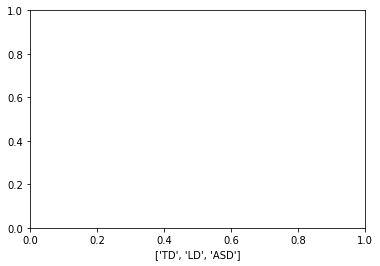

In [37]:
plt.xlabel(['TD', 'LD','ASD'])

In [38]:
data=pd.concat([ld_score[~ld_score.sampleName.isin(test.sampleName)], test[test.real==0],test_asd])

In [39]:
data

,sampleName,weightedEstimate,real
3,18,0.260220,1
4,181,0.096520,1
5,189,0.000000,1
6,2,0.097594,1
7,210,0.251294,1
...,...,...,...
59,9,0.795899,ASD
60,90,1.000000,ASD
63,96,0.268904,ASD
64,98,0.684266,ASD


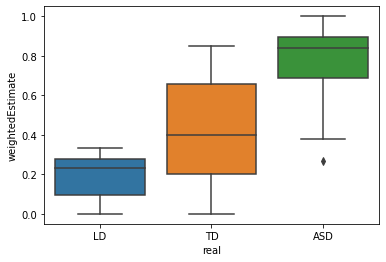

In [40]:
data['real'] = data['real'].replace(0,'TD')
data['real'] = data['real'].replace(1,'LD')
sns.boxplot(data=data, x='real', y='weightedEstimate')

data.to_csv("/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/ld_td_asd.csv")

In [53]:
main_score = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/main_consensus.csv')
test_score = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/test_consensus.csv')
ld_subjectid = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/ld_concensus.csv')
ld_sample_id = pd.read_csv('/Volumes/Work/Vahid_work/classification_newcode_data/Supplementary_data/ld_td_asd.csv')

In [66]:
ld_sample_id=ld_sample_id[ld_sample_id.real=='LD']

In [63]:
ld_subjectid = ld_subjectid[ld_subjectid['Unnamed: 0'].isin(ld_sample_id['sampleName']) & (ld_subjectid.diagnosis_binary=='LD')]
ld_subjectid


,Unnamed: 0,subjectId,blooddrawid,age,recentDx_EvalDate,diagnosis_binary,diagnosis_multi1,batch,sex,Neutrophil,Tcell,Monocyte,Bcell,NKcell,PlasmaCell,DendriticCell
0,385,A6P6J,910-01,12.025,11-02-12,LD,LD,2,M,-0.031240,0.028509,-0.024152,-0.002992,0.102231,-0.003836,-0.022244
1,287,B3E8L,695-01,14.292,08-13-12,LD,LD,2,M,0.026456,-0.024772,-0.015840,0.092777,-0.028713,-0.005064,-0.010239
2,73,B4L7F,259-01,14.456,12-16-08,LD,LD,2,M,-0.014186,0.077883,-0.030917,-0.055992,0.034684,-0.021758,-0.014510
5,263,C3K7G,652-01,27.598,08-14-10,LD,LD,2,M,0.035619,-0.039362,0.022866,0.020424,0.010811,-0.048926,0.001059
7,350,D7Z5U,806-01,23.228,03-07-11,LD,LD,2,M,-0.008215,0.003891,-0.039894,0.024059,0.025543,0.031111,0.080010
12,321,G8K4F,758,15.901,12-16-10,LD,LD,2,M,-0.018020,0.042130,-0.027743,-0.002173,0.013733,-0.003006,0.003783
14,181,G9P3X,497-01,30.949,08-07-10,LD,LD,2,M,-0.012014,-0.031476,-0.031025,-0.055165,0.108501,-0.029366,-0.034443
16,45,H4M6T,201-01,31.639,01-21-09,LD,LD,2,M,0.032632,-0.025442,0.043571,-0.061934,-0.002685,0.012858,-0.008347
17,18,H5Z7Y,136-01,13.569,04-15-09,LD,LD,2,M,-0.002500,-0.086357,0.059304,-0.032533,0.046775,0.093744,0.031516
18,76,H8M9E,271-01,12.320,01-13-09,LD,LD,2,M,-0.027456,0.004565,-0.007861,-0.014771,0.027555,0.028078,0.130629


In [8]:
gene_mutation = pd.read_excel('/Volumes/Work/Vahid_work/classification_newcode_data/gene_mutation/all_gene_mutation Subjects on MIPs 5-2018 VHG.xlsx')


In [70]:
sample_id_ld = ld_subjectid[ld_subjectid.subjectId.isin(gene_mutation.Individual)]['Unnamed: 0']
ld_sample_id[ld_sample_id.sampleName.isin(sample_id_ld)].weightedEstimate.mean()
ld_sample_id[~ld_sample_id.sampleName.isin(sample_id_ld)].weightedEstimate.mean()


0.1952974806698084

In [25]:
_score = pd.concat([test_score, main_score])
_score.head()

,sampleName,weightedEstimate,real,group,final_ADOS_CoSoTot,recentDxJ_dxCode,recentDxJ_ageMo,subjectID,sampleLabel
0,100,0.709183,1,test,19,ASD,31.770,U3V4P,Below-the-mean
1,102,0.130185,0,test,3,TD,32.493,E9M4P,TD
2,104,0.313002,0,test,1,TD,37.027,J2Y7X,TD
3,105,0.240016,0,test,4,TD,36.862,N9D8X,TD
4,129,0.210296,0,test,1,TD,34.234,Z7B6Y,TD


In [23]:
gene_mutation[gene_mutation.Individual.isin(_score.subjectID)]

,Individual,GENE,functionGVS,Score.Details,Score,sex,diagnosis_Seq,clusterNo,wasSelected
3,B5Z4P,LZTR1,splice-donor,4.4 + acc,3,M,TD;TD;TD;TD,NaN,NaN
7,B8C8D,NCKAP1,missense,2.1,2,NaN,ASD Features;ASD;ASD,NaN,1.0
17,C5V2N,NAV2,missense,4.4 + acc,3,M,TD;TD;TD;TD,NaN,NaN
22,D4M4M,MYH9,missense_variant,NaN,NaN,M,ASD,NaN,NaN
37,G9A6Q,DLG4,missense,NaN,NaN,M,LD;TD;TD,NaN,NaN
38,G9Q5B,SIGLEC11,frameshift,NaN,NaN,M,LD;TD,NaN,NaN
44,J2T2N,DIP2A,missense,3.3,3,M,ASD;ASD,1.0,NaN
45,J2Y7X,ANK3,missense,NaN,NaN,M,Other;TD;TD,NaN,NaN
48,J7S7Z,CTTNBP2,frameshift,3.1,3,M,TD;TD;TD;TD,5.0,NaN
54,K9S3V,CACNA2D3,missense,2.1,2,M,TD;TD;TD,NaN,NaN


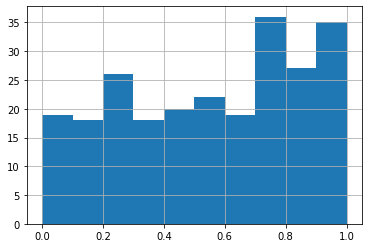

In [20]:
_score.weightedEstimate.hist()

In [33]:
cutted_score = _score[_score.subjectID.isin(gene_mutation[gene_mutation.Individual.isin(_score.subjectID)].Individual)]
left_score = _score[~_score.subjectID.isin(gene_mutation[gene_mutation.Individual.isin(_score.subjectID)].Individual)]


In [36]:
left_score

,sampleName,weightedEstimate,real,group,final_ADOS_CoSoTot,recentDxJ_dxCode,recentDxJ_ageMo,subjectID,sampleLabel
1,102,0.130185,0,test,3,TD,32.493,E9M4P,TD
3,105,0.240016,0,test,4,TD,36.862,N9D8X,TD
4,129,0.210296,0,test,1,TD,34.234,Z7B6Y,TD
5,13,0.874263,1,test,17,ASD,32.526,A5M2D,Above-the-mean
6,19,0.688535,0,test,2,TD,80.263,V5J4N,TD
...,...,...,...,...,...,...,...,...,...
170,4807258032_C,0.139876,0,main,2,TD,16.361,Y2W7Y,TD
171,4807258033_B,0.221025,0,main,0,TD,38.341,R3E9X,TD
172,4807258034_E,0.710045,1,main,7,ASD,35.088,S6H2W,Below-the-mean
173,4807258035_D,0.096381,0,main,2,TD,13.437,J2B8Q,TD


In [26]:
pd.crosstab(index=cutted_score['recentDxJ_dxCode'], columns=cutted_score['sampleLabel'])

sampleLabel,Above-the-mean,Below-the-mean,TD
recentDxJ_dxCode,,,
ASD,8,6,0
TD,0,0,17


In [39]:
from scipy.stats import ttest_ind, ttest_1samp, normaltest, mannwhitneyu, ranksums
print(cutted_score[cutted_score.recentDxJ_dxCode=='ASD'].weightedEstimate.mean(), 
left_score[left_score.recentDxJ_dxCode=='ASD'].weightedEstimate.mean(),)
ttest_ind(cutted_score[cutted_score.recentDxJ_dxCode=='ASD'].weightedEstimate, 
left_score[left_score.recentDxJ_dxCode=='ASD'].weightedEstimate,)

0.697506778857143 0.725992903539823


Ttest_indResult(statistic=-0.4408460088625181, pvalue=0.6600859838825621)

In [38]:
ttest_ind(cutted_score[cutted_score.recentDxJ_dxCode=='TD'].weightedEstimate, 
left_score[left_score.recentDxJ_dxCode=='TD'].weightedEstimate,)

Ttest_indResult(statistic=-2.0182705868411377, pvalue=0.04599651467950774)

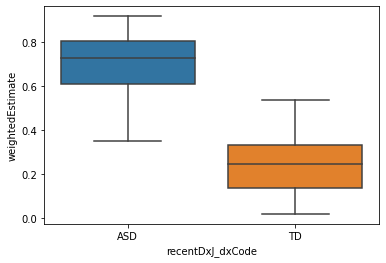

In [27]:
sns.boxplot(data=cutted_score, x='recentDxJ_dxCode', y='weightedEstimate')

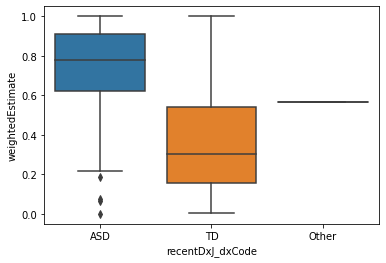

In [28]:
sns.boxplot(data=_score, x='recentDxJ_dxCode', y='weightedEstimate')